# Data Assimilation Notebook

This notebook includes several strategies for performing Data Assimilation for both the LSTM and the GAN. We will guide the reader through the options we tried as well as our final choices. 

The graph just below is an outline of the different things we tried. The notebook will explore more thoroughly each strategy, its underlying logic, and ultimately our final choice. 

![Example Image](Images/mindmap.jpg)

In [1]:
#necessary imports 
import numpy as np
import pickle
from sklearn.decomposition import PCA

from tools import *

# Data Assimilation - LSTM

## 4 images + PCA trained on `Ferguson_fire_obs`

### Load data

In [2]:
sensor = np.load('Data/Ferguson_fire_obs.npy')
sensor = sensor[1:5, :, :]
sensor_1D = np.reshape(
    sensor, (np.shape(sensor)[0], np.shape(sensor)[1] * np.shape(sensor)[2]))

In [5]:
LSTM_background = np.load('LSTM_background 1.npy')
LSTM_background = LSTM_background[0:4, :, :]

LSTM_background_1D = np.reshape(
    LSTM_background, (np.shape(LSTM_background)[0], np.shape(LSTM_background)[1] * np.shape(LSTM_background)[2]))

### PCA

In [58]:
# Build the model base on sensor data and compress it
d = 4
pca = PCA(n_components=d)
sensor_compressed = pca.fit_transform(sensor_1D)
# Decompress
sensor_recovered = pca.inverse_transform(sensor_compressed)

# Compress and decompress model data
model_compressed = pca.transform(LSTM_background_1D)
model_recovered = pca.inverse_transform(model_compressed)

### Data Assimilation

In [60]:
nNodes = d
I = np.identity(nNodes)
R = np.cov(sensor_compressed.T)  
H = I
B = np.cov(model_compressed.T) 

In [61]:
updated_recovered = data_assimilation(model_compressed, sensor_compressed, sensor, LSTM_background, sensor_1D, pca, B, H, R)

MSE before DA in Reduced Space: 242.10470619252237
MSE after DA in Reduced Space: 235.6548680801843
Time for DA: 0.009074926376342773 seconds
----------------------------------------
MSE before DA in Physical Space: 0.06740322343717355
MSE after DA in Physical Space: 0.014383231694347336
Time for DA + Decompression: 0.04034161567687988 seconds


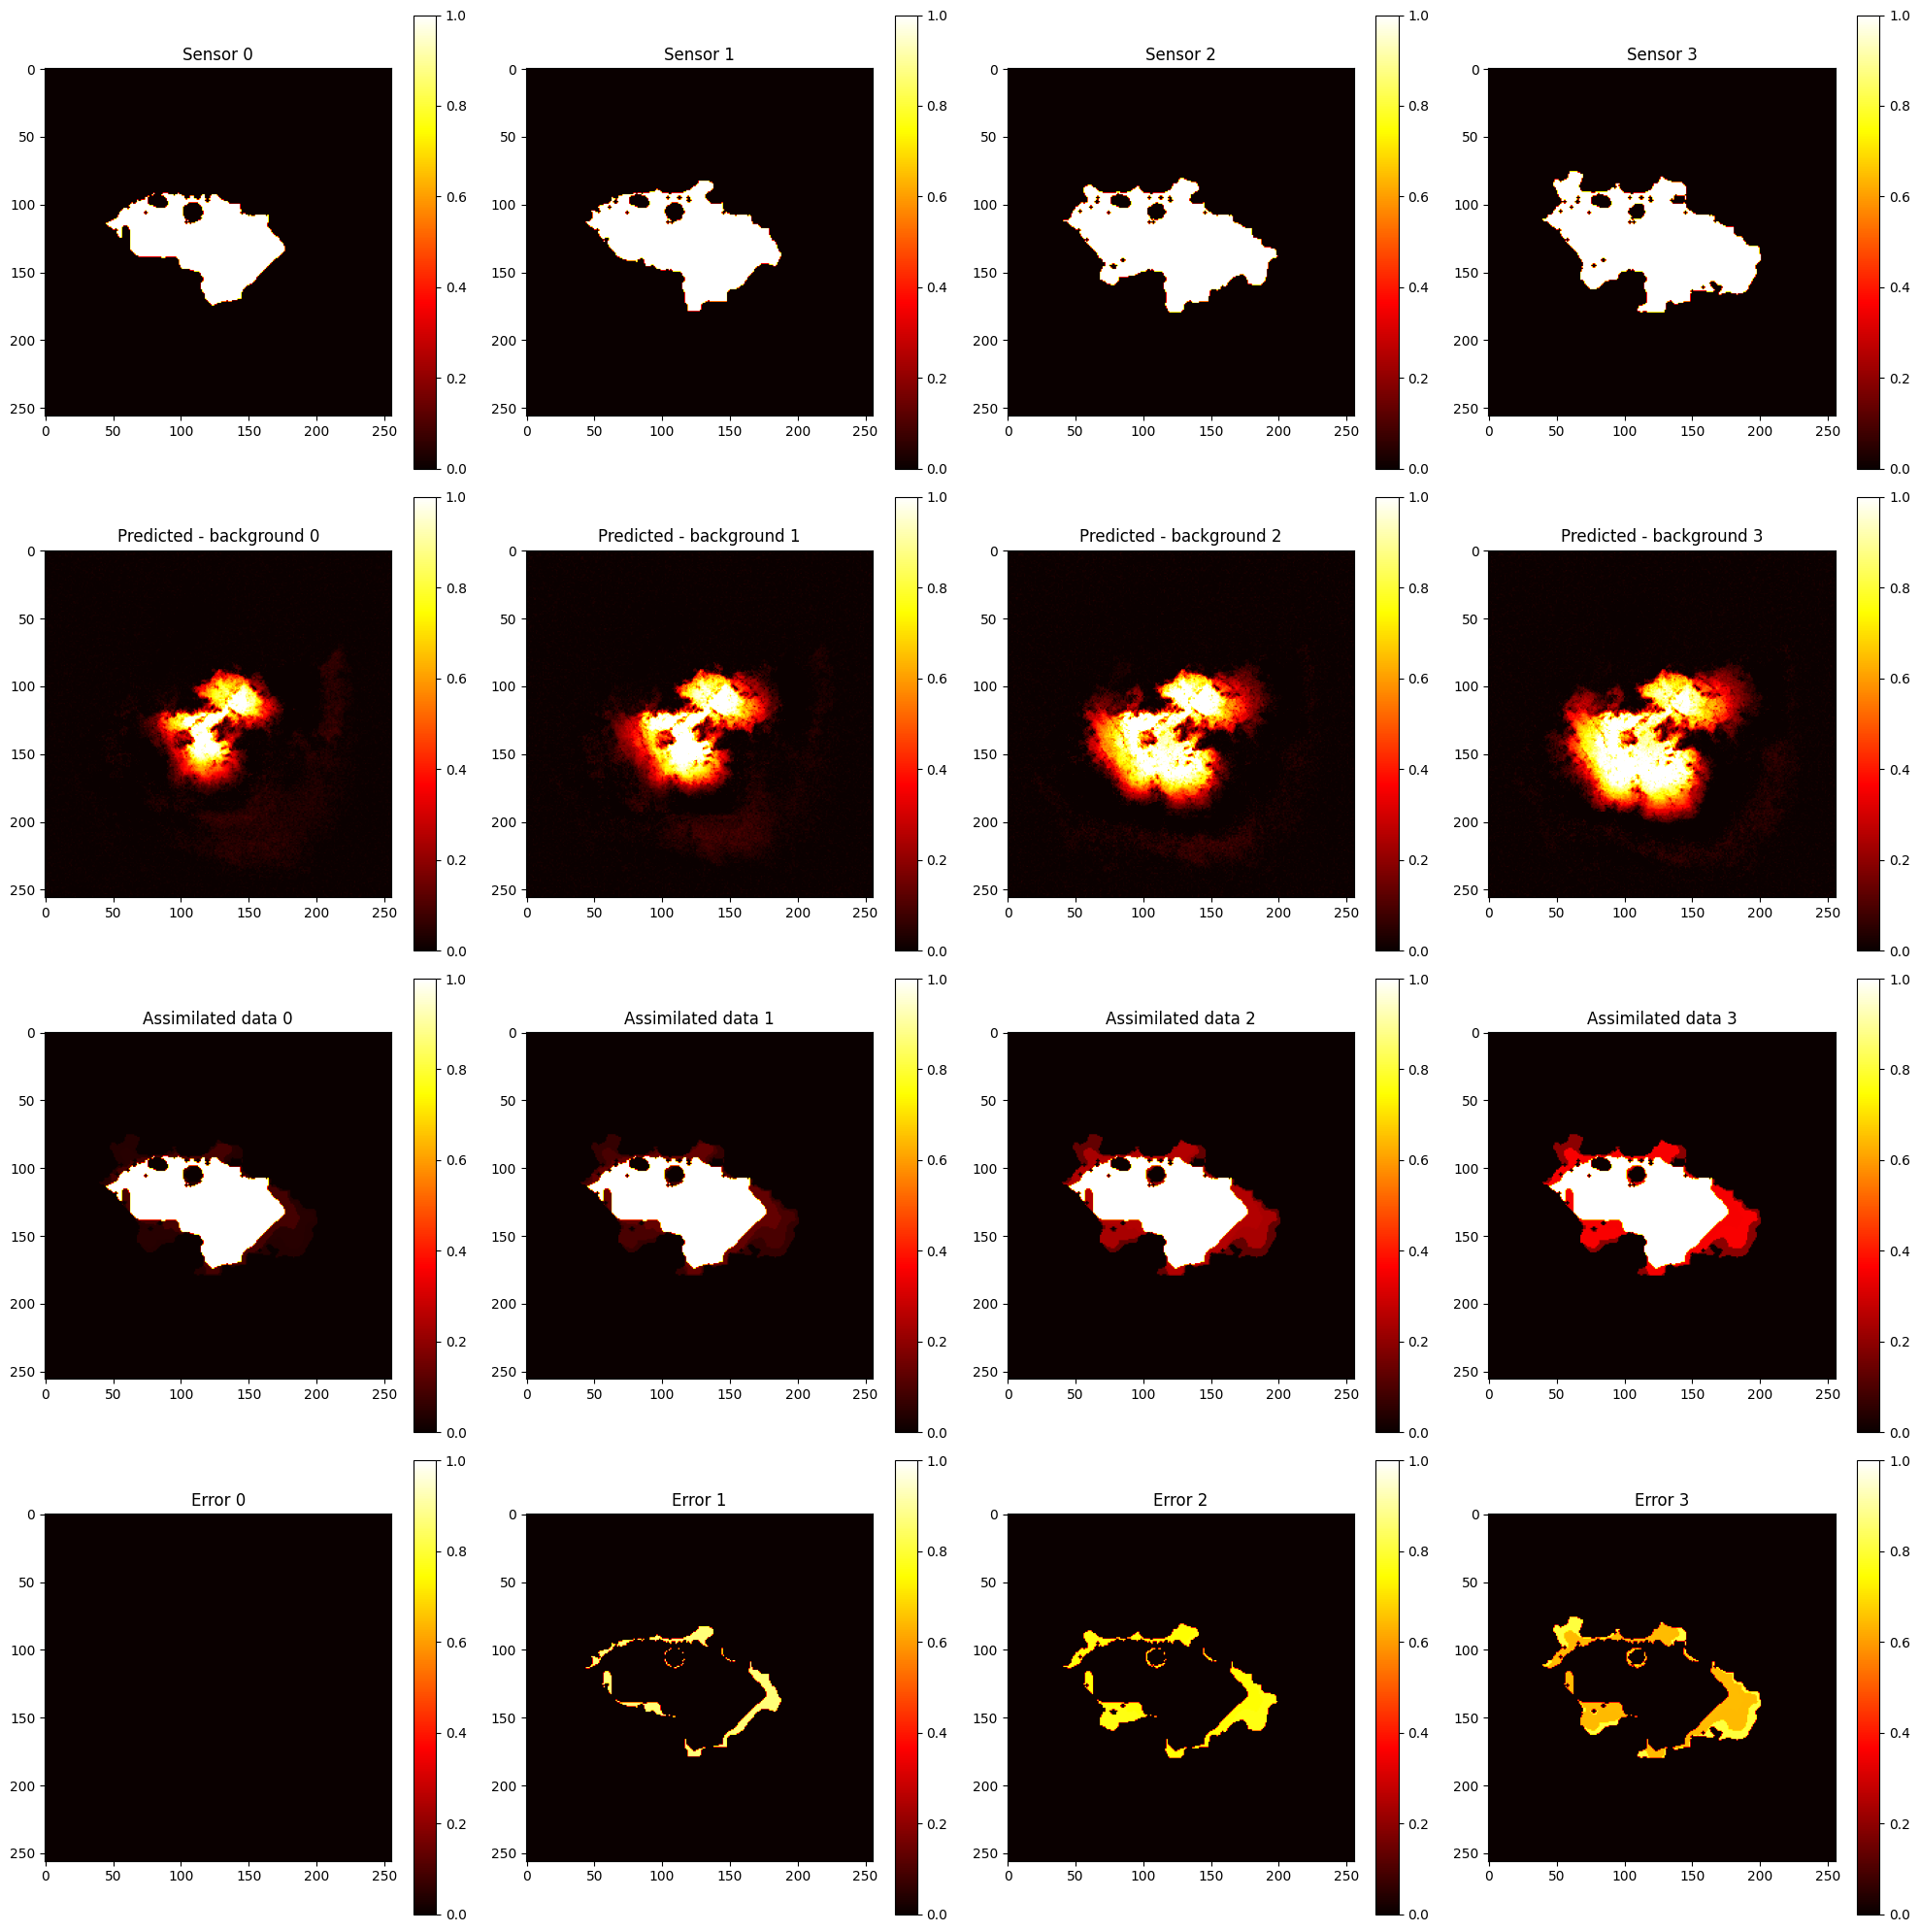

In [62]:
plot_data(sensor, LSTM_background, updated_recovered)

## 4 images + PCA trained on `Ferguson_fire_train`

### PCA

In [8]:
with open('model/pca_final.pkl', 'rb') as file:
    pca_final = pickle.load(file)

sensor_compressed = pca_final.transform(sensor_1D)
# Decompress
sensor_recovered = pca_final.inverse_transform(sensor_compressed)

# Compress and decompress model data
model_compressed = pca_final.transform(LSTM_background_1D)
model_recovered = pca_final.inverse_transform(model_compressed)

### Data Assimilation

In [ ]:
nNodes = 306
I = np.identity(nNodes)
R = np.cov(sensor_compressed.T)  
H = I
B = np.cov(model_compressed.T) 

In [ ]:
updated_recovered = data_assimilation(model_compressed, sensor_compressed, sensor, LSTM_background, sensor_1D, pca, B, H, R)

MSE before DA in Reduced Space: 6.685780651702213
MSE after DA in Reduced Space: 48162.20866624136
Time for DA: 0.01121211051940918 seconds
----------------------------------------
MSE before DA in Physical Space: 0.06740322343717355
MSE after DA in Physical Space: 224.91440444331994
Time for DA + Decompression: 0.029211997985839844 seconds


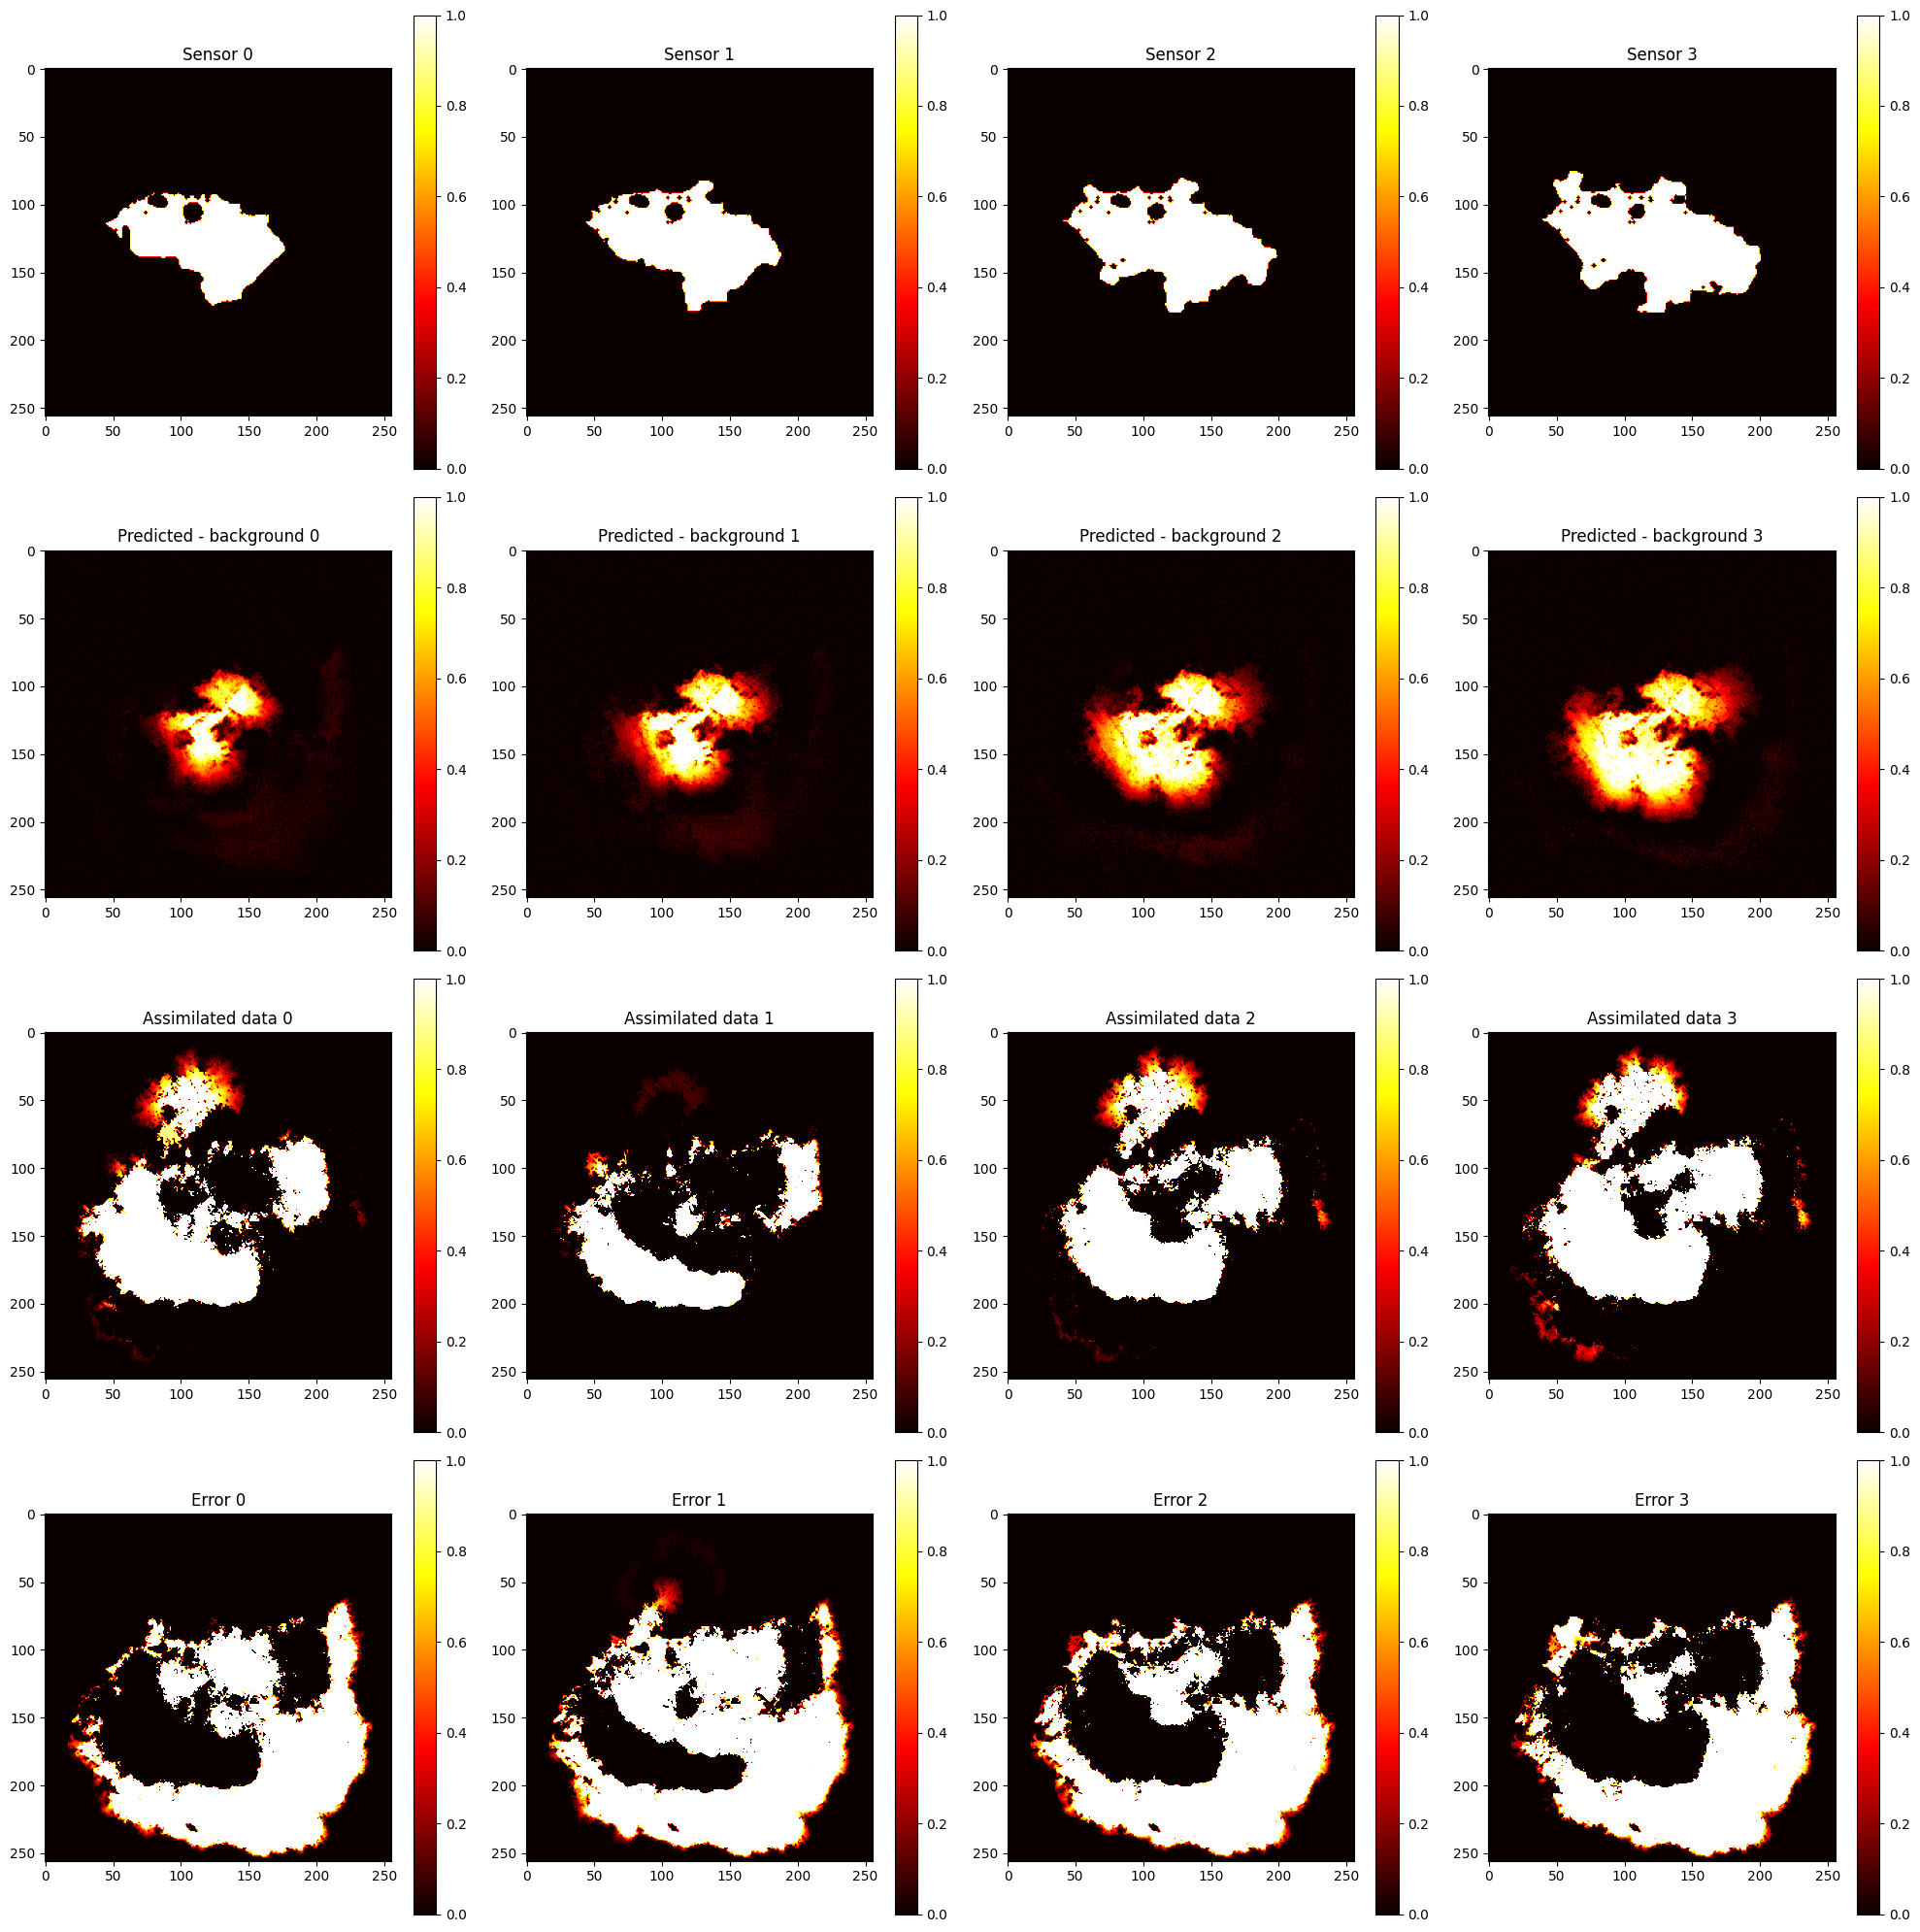

In [ ]:
plot_data(sensor, LSTM_background, updated_recovered)

## 1 image + PCA trained on `Ferguson_fire_obs`

### Load data

In [5]:
sensor = sensor[1, :, :]
sensor_1D = np.reshape(
    sensor, (np.shape(sensor)[0] * np.shape(sensor)[1]))
sensor_1D = np.expand_dims(sensor_1D, axis=0)
sensor_1D.shape

(1, 65536)

In [9]:
LSTM_background = LSTM_background[0, :, :]
LSTM_background_1D = np.reshape(
    LSTM_background, (np.shape(LSTM_background)[0] * np.shape(LSTM_background)[1]))
LSTM_background_1D = np.expand_dims(LSTM_background_1D, axis=0)
LSTM_background_1D.shape

### PCA

In [ ]:
sensor_compressed = pca_final.transform(sensor_1D)
# Decompress
sensor_recovered = pca_final.inverse_transform(sensor_compressed)

# Compress and decompress model data
model_compressed = pca_final.transform(LSTM_background_1D)
model_recovered = pca_final.inverse_transform(model_compressed)

### Data Assimilation

In [ ]:
nNodes = 306
I = np.identity(nNodes)
R = np.cov(sensor_compressed)  
H = I
B = np.cov(model_compressed) 

In [ ]:
updated_recovered = data_assimilation(model_compressed, sensor_compressed, sensor, LSTM_background, sensor_1D, pca, B, H, R)

MSE before DA in Reduced Space: 7.893762931216181
MSE after DA in Reduced Space: 0.04626376348141761
Time for DA: 0.016396045684814453 seconds
----------------------------------------
MSE before DA in Physical Space: 0.06862533134263145
MSE after DA in Physical Space: 0.03182709523602214
Time for DA + Decompression: 0.025173187255859375 seconds


### Threshold

In [ ]:
updated_recovered[updated_recovered < 0.3] = 0

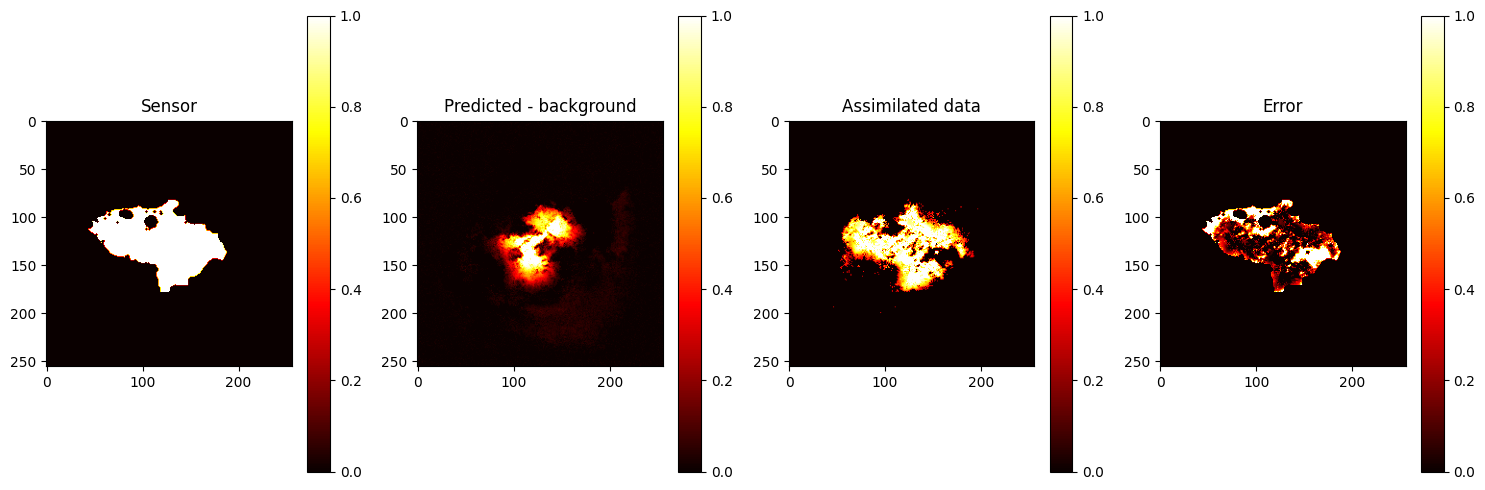

In [ ]:
plot_data(sensor, LSTM_background, updated_recovered)

# Data Assimilation - GAN

## 5 images + PCA trained on `Ferguson_fire_obs`

### Load data

In [2]:
sensor = np.load('Data/Ferguson_fire_obs.npy')


sensor_1D = np.reshape(
    sensor, (np.shape(sensor)[0], np.shape(sensor)[1] * np.shape(sensor)[2]))
sensor_1D.shape

(5, 65536)

In [3]:
npy_paths = [f'GAN_background_{i}.npy' for i in range(5)]


images = [np.load(path) for path in npy_paths]
GAN_background = np.stack(images, axis=0)
GAN_background_1D = np.reshape(
    GAN_background, (np.shape(GAN_background)[0], np.shape(GAN_background)[1] * np.shape(GAN_background)[2]))
GAN_background_1D.shape


(5, 65536)

### PCA

In [4]:
# Build the model base on sensor data and compress it
d = 4
pca = PCA(n_components=d)
sensor_compressed = pca.fit_transform(sensor_1D)
# Decompress
sensor_recovered = pca.inverse_transform(sensor_compressed)

# Compress and decompress model data
model_compressed = pca.transform(GAN_background_1D)
model_recovered = pca.inverse_transform(model_compressed)

### Data Assimilation

In [5]:
nNodes = 4
I = np.identity(nNodes)
R = np.cov(sensor_compressed.T)  
H = I
B = np.cov(model_compressed.T) 

In [6]:
updated_recovered = data_assimilation(model_compressed, sensor_compressed, sensor, GAN_background, sensor_1D, pca, B, H, R)

MSE before DA in Reduced Space: 751.2199707929559
MSE after DA in Reduced Space: 747.8924192933813
Time for DA: 0.00023889541625976562 seconds
----------------------------------------
MSE before DA in Physical Space: 0.0882354736328125
MSE after DA in Physical Space: 0.04564773066976278
Time for DA + Decompression: 0.011128902435302734 seconds


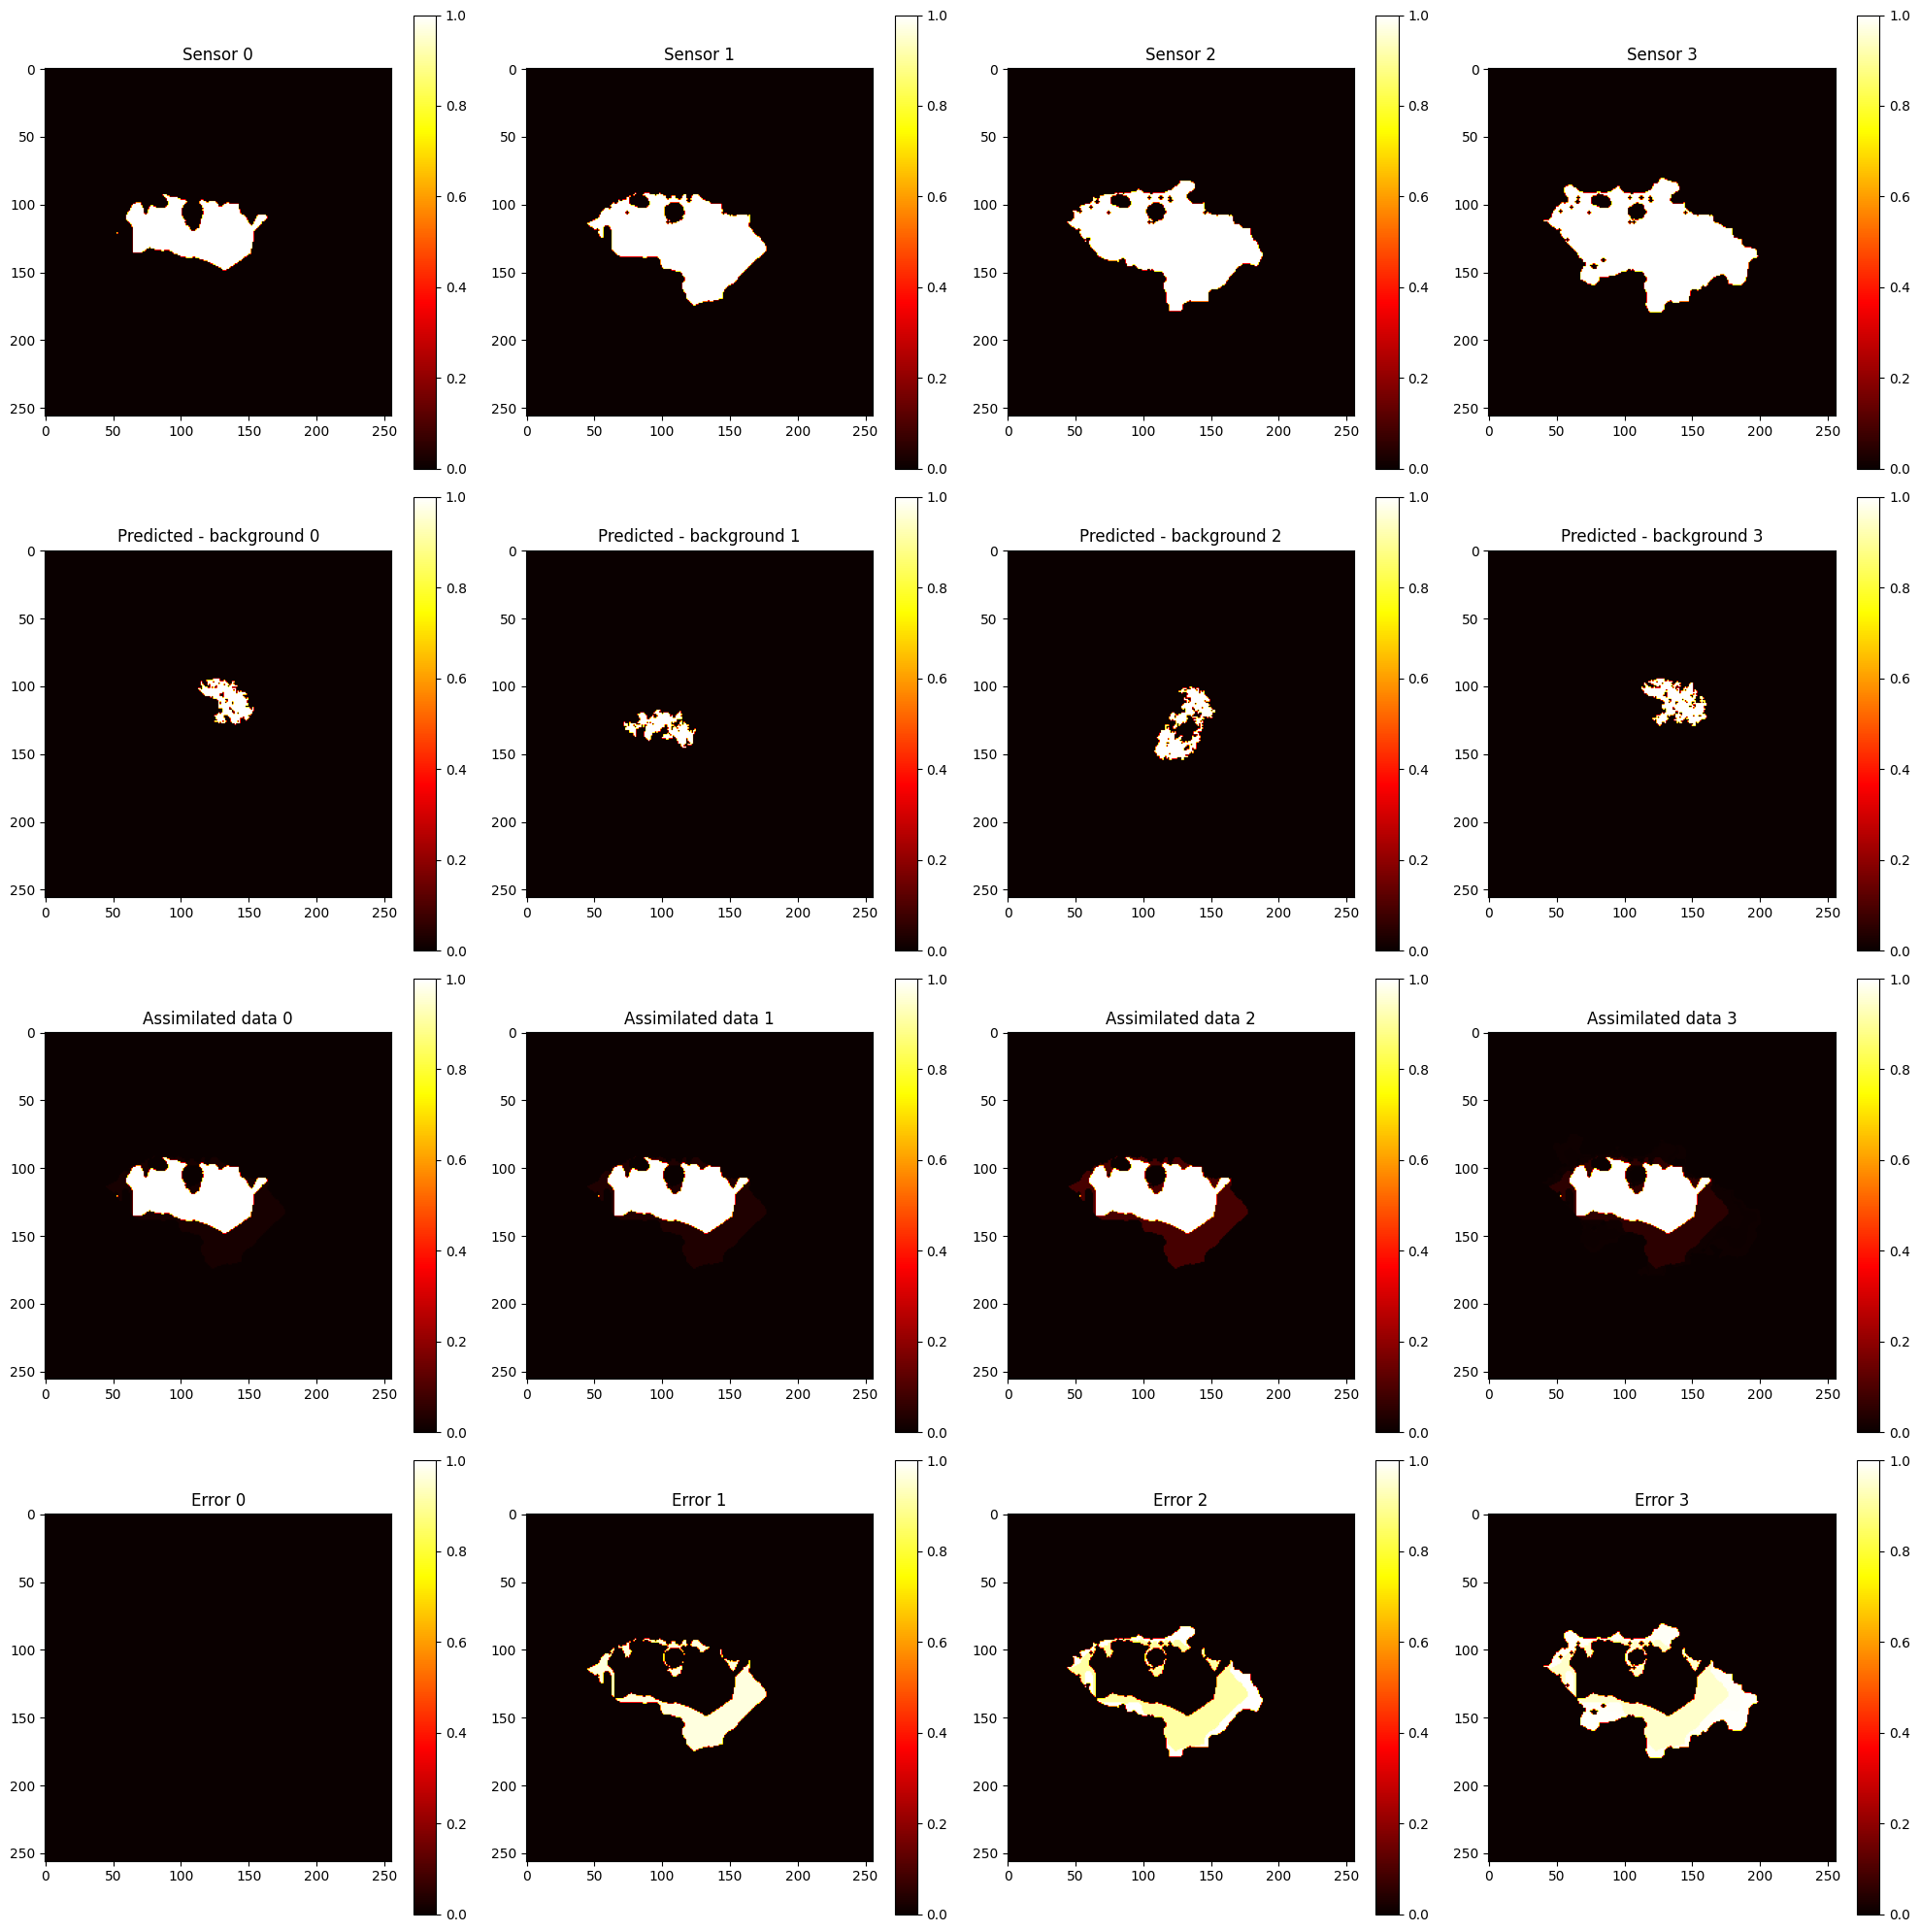

In [7]:
plot_data(sensor, GAN_background, updated_recovered)

## 5 images + PCA trained on `Ferguson_fire_train`

### PCA

In [ ]:
with open('model/pca_final.pkl', 'rb') as file:
    pca_final = pickle.load(file)


sensor_compressed = pca_final.transform(sensor_1D)
# Decompress
sensor_recovered = pca_final.inverse_transform(sensor_compressed)

# Compress and decompress model data
model_compressed = pca_final.transform(GAN_background_1D)
model_recovered = pca_final.inverse_transform(model_compressed)

### Data Assimilation

In [ ]:
nNodes = 306
I = np.identity(nNodes)
R = np.cov(sensor_compressed.T)  
H = I
B = np.cov(model_compressed.T) 

In [ ]:
updated_recovered = data_assimilation(model_compressed, sensor_compressed, sensor, GAN_background, sensor_1D, pca, B, H, R)

MSE before DA in Reduced Space: 11.543169906537319
MSE after DA in Reduced Space: 4991.654479706506
Time for DA: 0.01595592498779297 seconds
----------------------------------------
MSE before DA in Physical Space: 0.0882354736328125
MSE after DA in Physical Space: 23.338352093737715
Time for DA + Decompression: 0.0272829532623291 seconds


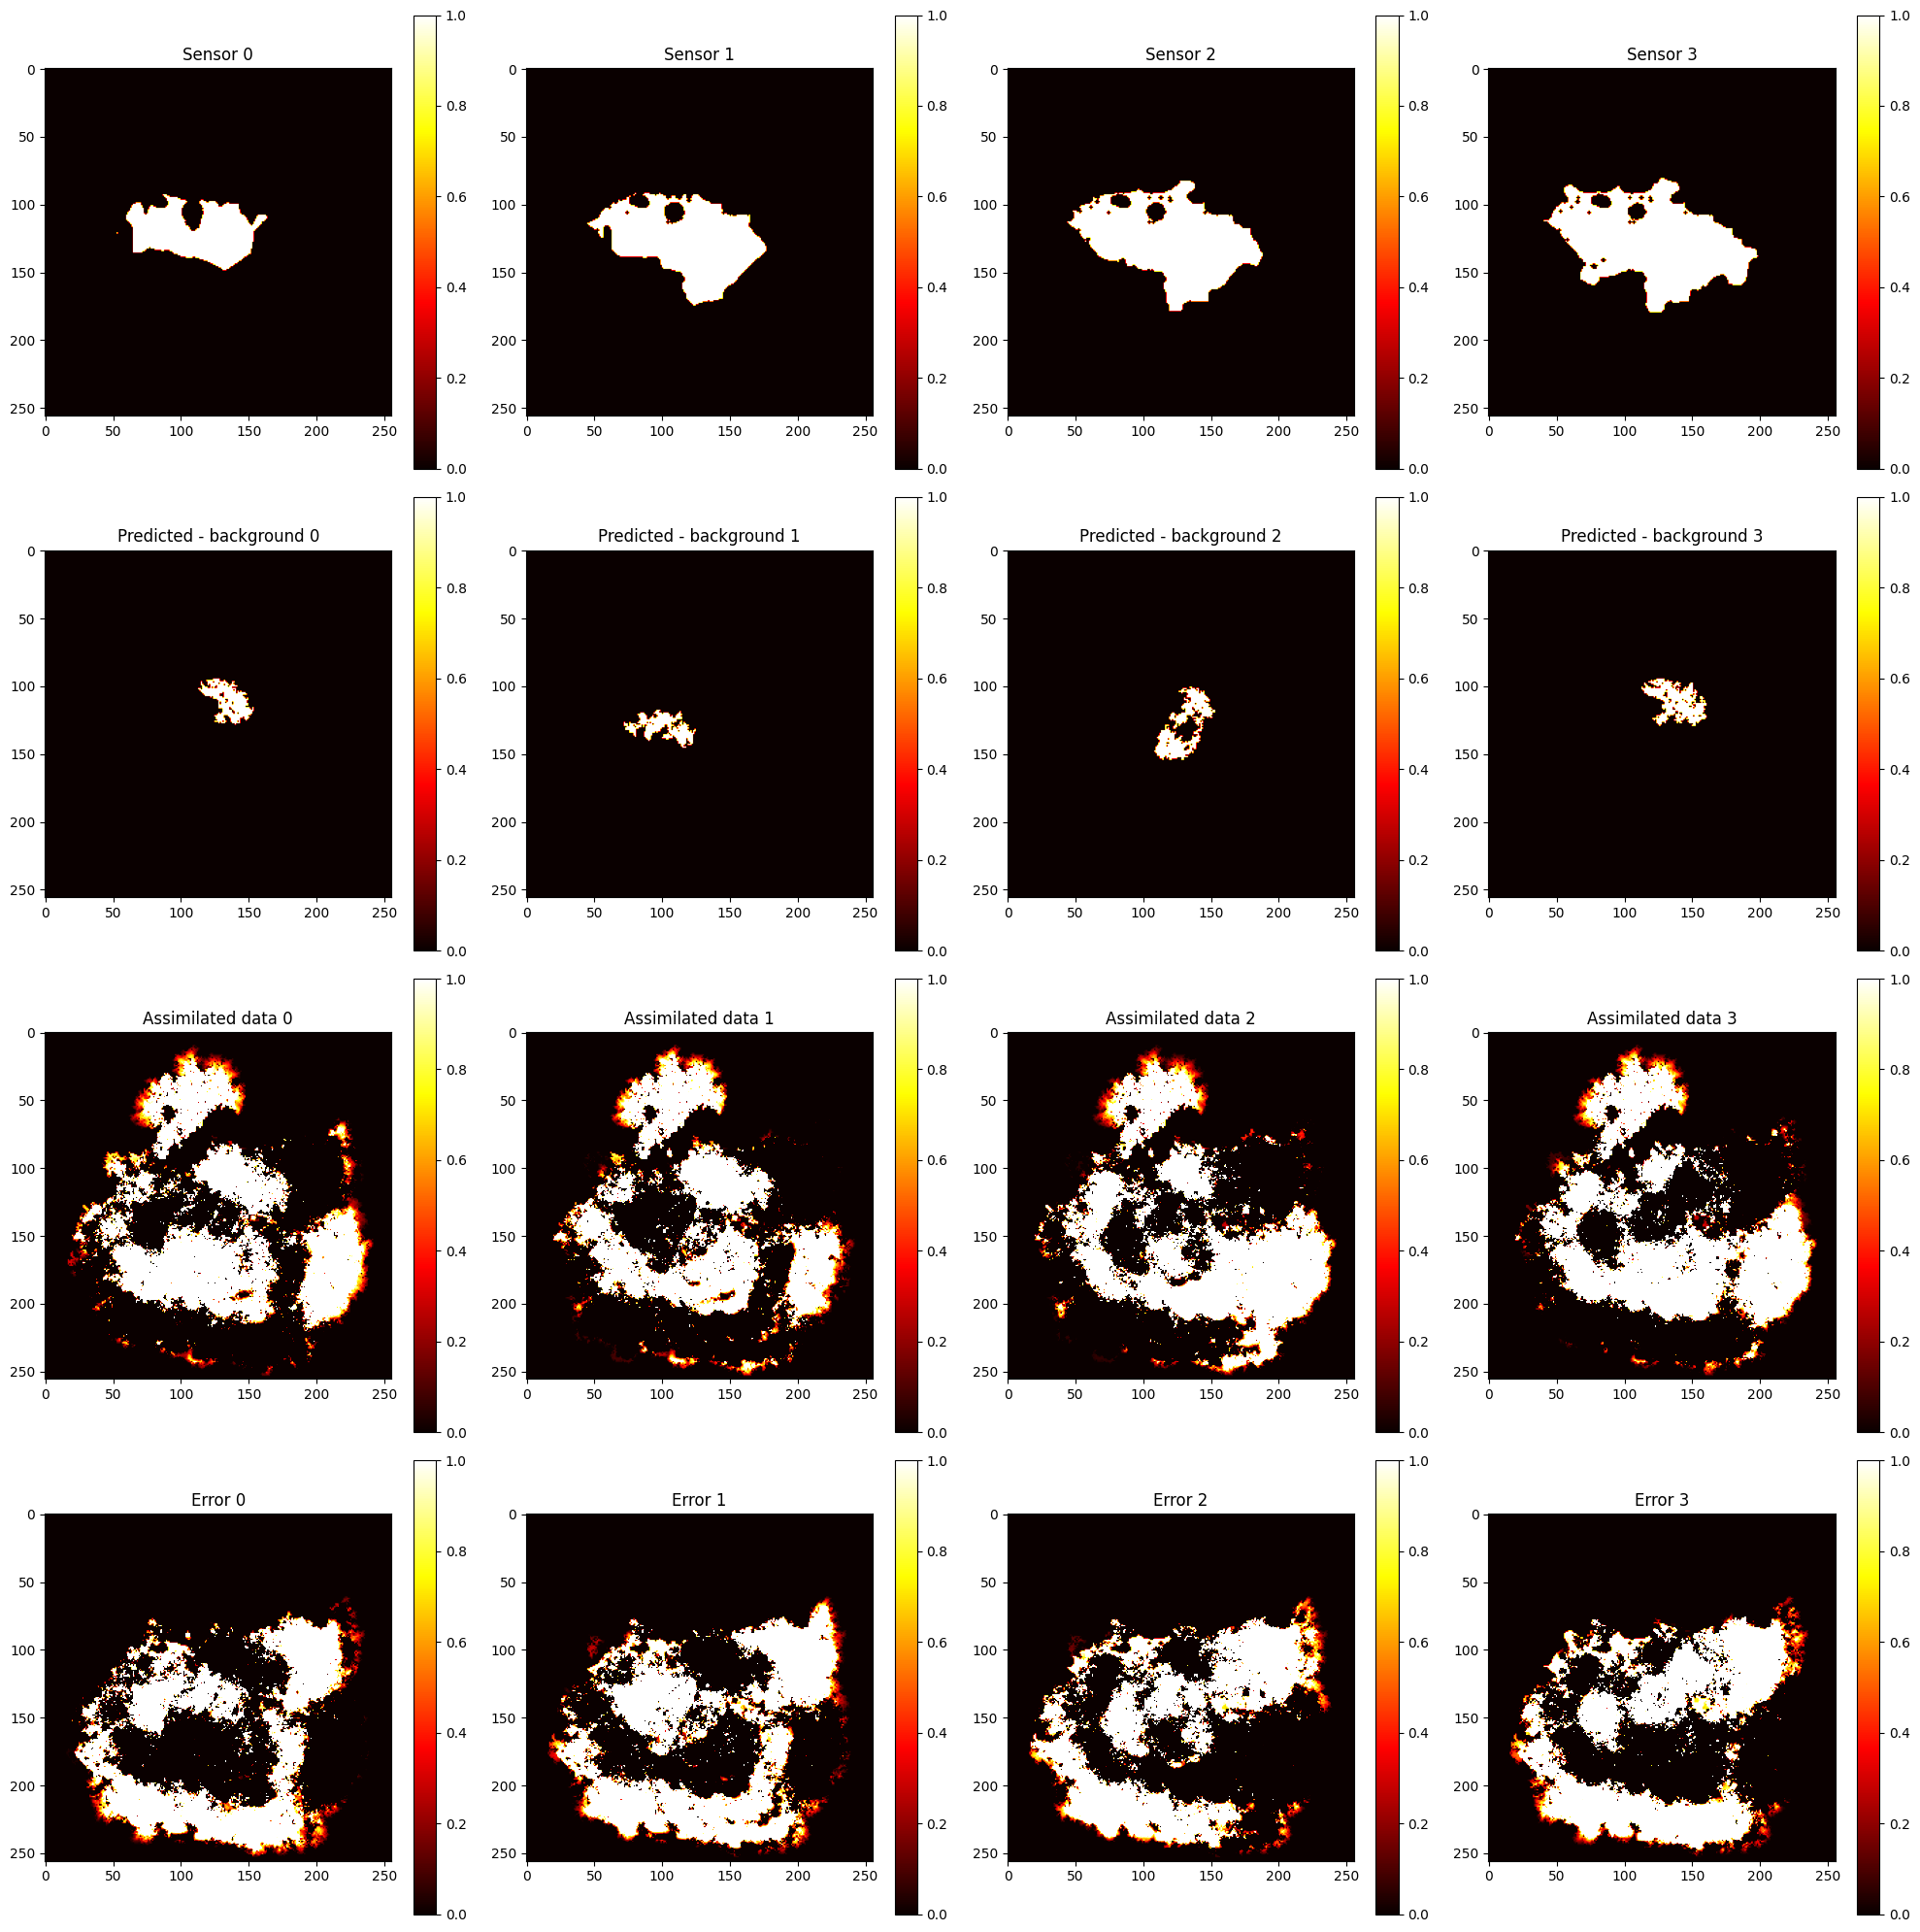

In [ ]:
plot_data(sensor, GAN_background, updated_recovered)

## 1 image + PCA trained on `Ferguson_fire_train`

### Load data

In [ ]:
sensor = sensor[0, :, :]

sensor_1D = np.reshape(
    sensor, (np.shape(sensor)[0] * np.shape(sensor)[1]))
sensor_1D = np.expand_dims(sensor_1D, axis=0)
sensor_1D.shape

(1, 65536)

In [ ]:
GAN_background = np.load('Data/GAN_background_0.npy')


GAN_background_1D = np.reshape(
    GAN_background, (np.shape(GAN_background)[0] * np.shape(GAN_background)[1]))
GAN_background_1D = np.expand_dims(GAN_background_1D, axis=0)
GAN_background_1D.shape

(1, 65536)

### PCA

In [ ]:
with open('model/pca_final.pkl', 'rb') as file:
    pca_final = pickle.load(file)

sensor_compressed = pca_final.transform(sensor_1D)
# Decompress
sensor_recovered = pca_final.inverse_transform(sensor_compressed)

# Compress and decompress model data
model_compressed = pca_final.transform(GAN_background_1D)
model_recovered = pca_final.inverse_transform(model_compressed)

### Data Assimilation|

In [ ]:
nNodes = 306
I = np.identity(nNodes)
R = np.cov(sensor_compressed)  
H = I
B = np.cov(model_compressed) 

In [ ]:
updated_recovered = data_assimilation(model_compressed, sensor_compressed, sensor, GAN_background, sensor_1D, pca, B, H, R)

MSE before DA in Reduced Space: 5.870705346195869
MSE after DA in Reduced Space: 0.017904582088835472
Time for DA: 0.02959918975830078 seconds
----------------------------------------
MSE before DA in Physical Space: 0.042205810546875
MSE after DA in Physical Space: 0.013231018325787965
Time for DA + Decompression: 0.03556394577026367 seconds


### Threshold

In [ ]:
updated_recovered[updated_recovered < 0.3] = 0

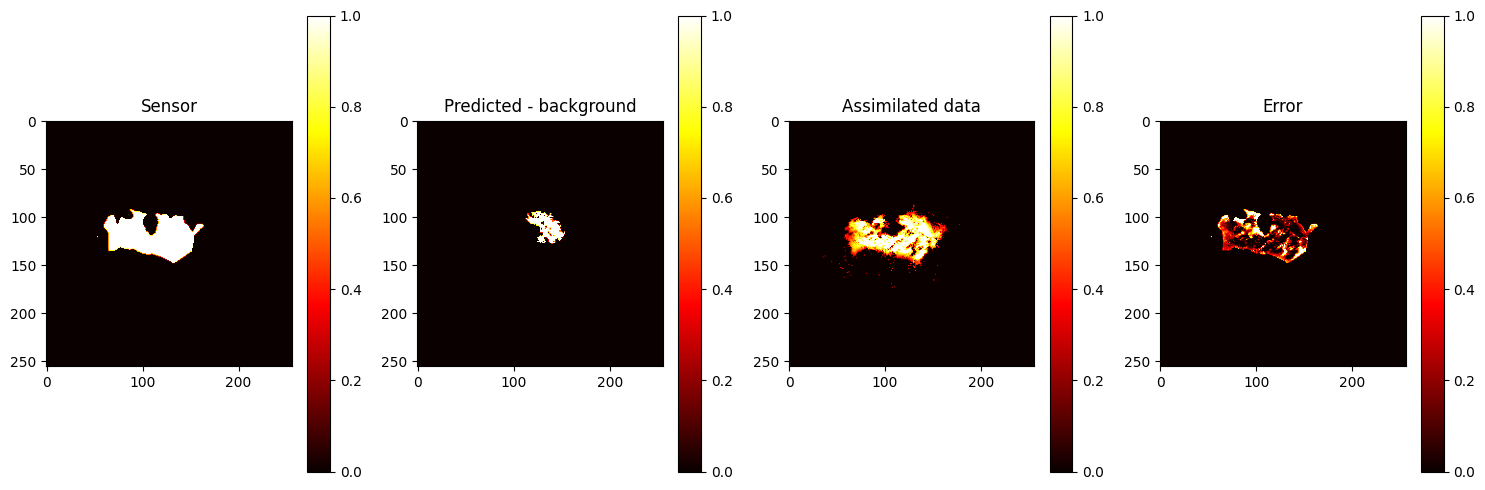

In [ ]:
plot_data(sensor, GAN_background, updated_recovered)

_____

# Final Model

## Observations and Comments

Before providing the Final Model, we will provide some comments on the problem. 

The problem was posed as follows: "Compute the covariance matrices for background data (matrix B) and sattelite data (matrix R) in the data assimilation model." We understood the background data to mean that which was generated from each of the models in Objective 1 and 2. 

For the LSTM, this logic tracks. We are able to give it four images determined temporally and in accordance with the timesteps of the sensors. In using all four images, we had two options: we could either use a PCA trained on the training data or the sensor data. We tried both options, and you can clearly see that the PCA trained on the sensor data performs much better. 

(NB: We have loaded in the PCA model we used last week. If this were to be the choice for the final model, we would have retrained it in this notebook, but since we will not be using it as part of our final model, we thought it was fine to just load it in.)

For the GAN, things make less sense. In group meetings, we were directed to use only one image. However, this led us down a bit of a rabbit hole because creating a covariance matrix for a single value is mathematically invalid due to the nature of how covariance is defined. Covariance measures how much two random variables change together, and it requires multiple observations to compute this relationship. If you compress using sensor data, you end up with size (1, 4). If you calculate R and B as you are supposed to, transposing this, you end up with too few degrees of freedom. 

You can compute the covariance matrix as a scalar (or really a matrix of size 1x1), but this is not representative of the PCA components. Still, we pursued this path to see the results that we would get. This is the result you can see with one image for both LSTM and GAN. Interestingly, it does seem to be the images that look closest to an "assimilation." By that, I mean you can see the shape of the sensor data and the patterning of the background data coming together. This could be a compelling reason to pursue that path, just because it visually makes sense. But, we cannot figure out how to justify the use of the scalar that is not representative of the number of components. 

For this reason, we have chosen to instead load in 5 images randomly generated by the GAN and use them with the PCA based on the sensor. There is not the same temporal aspect as is implicit in the LSTM, but the covariances between these randomly generated images (chosen because they are the most similar to the sensor data of the 2000 randomly generated images) can still capture the general dynamics of the fire system and can serve as a representation of background data in the Kalman filter assimilation process.

This approach provides a more robust representation of background data for assimilating sensor data, leveraging the GAN's ability to generate diverse images and using PCA to capture the relevant features based on sensor data.

Therefore, for both LSTM and GAN, we will be using the PCA based on sensor data and covariance matrices predicated on four/five images generated from the two models. 

In [69]:
#First I am going to remove one image from the GAN_background_1D so that it is the same size as the LSTM and the sensor data

GAN_background_1D = GAN_background_1D[:-1, :]

GAN_background_1D.shape

(4, 65536)

In [70]:
#building the pca for both the LSTM and GAN, based on the sensor data 

d = 4
pca = PCA(n_components=d)
sensor_compressed = pca.fit_transform(sensor_1D)
# Decompress
sensor_recovered = pca.inverse_transform(sensor_compressed)

In [71]:
#For the LSTM, compress and decompress model data
model_compressed_LSTM = pca.transform(LSTM_background_1D)
model_recovered_LSTM = pca.inverse_transform(model_compressed)

#For the GAN, compress and decompress model data
model_compressed_GAN = pca.transform(GAN_background_1D)
model_recovered_GAN = pca.inverse_transform(model_compressed_GAN)

The Kalman filter is already built above, so we do not need to rebuild it here. 

In [72]:
#covariance matrices for the LSTM 
nNodes = 4
I = np.identity(nNodes)
R = np.cov(sensor_compressed.T)  
H = I
B_LSTM = np.cov(model_compressed_LSTM.T) 

#covariance matrices for the GAN
B_GAN = np.cov(model_compressed_GAN.T) 

### Choosing R and B

Now that we have selected our base model, we will be searching for the best scaling factors for R and B for both the LSTM and the GAN DA. 

**Selecting B for LSTM DA**

Start Assimilation
Scale factor (cov): 0.10, MSE before DA: 242.1047, MSE after DA: 253.9805
Scale factor (cov): 105.36, MSE before DA: 242.1047, MSE after DA: 74.2809
Scale factor (cov): 210.62, MSE before DA: 242.1047, MSE after DA: 72.7344
Scale factor (cov): 315.87, MSE before DA: 242.1047, MSE after DA: 72.5432
Scale factor (cov): 421.13, MSE before DA: 242.1047, MSE after DA: 72.4907
Scale factor (cov): 526.39, MSE before DA: 242.1047, MSE after DA: 72.4528
Scale factor (cov): 631.65, MSE before DA: 242.1047, MSE after DA: 72.4098
Scale factor (cov): 736.91, MSE before DA: 242.1047, MSE after DA: 72.3591
Scale factor (cov): 842.16, MSE before DA: 242.1047, MSE after DA: 72.3014
Scale factor (cov): 947.42, MSE before DA: 242.1047, MSE after DA: 72.2382
Scale factor (cov): 1052.68, MSE before DA: 242.1047, MSE after DA: 72.1705
Scale factor (cov): 1157.94, MSE before DA: 242.1047, MSE after DA: 72.0994
Scale factor (cov): 1263.19, MSE before DA: 242.1047, MSE after DA: 72.0255
Scal

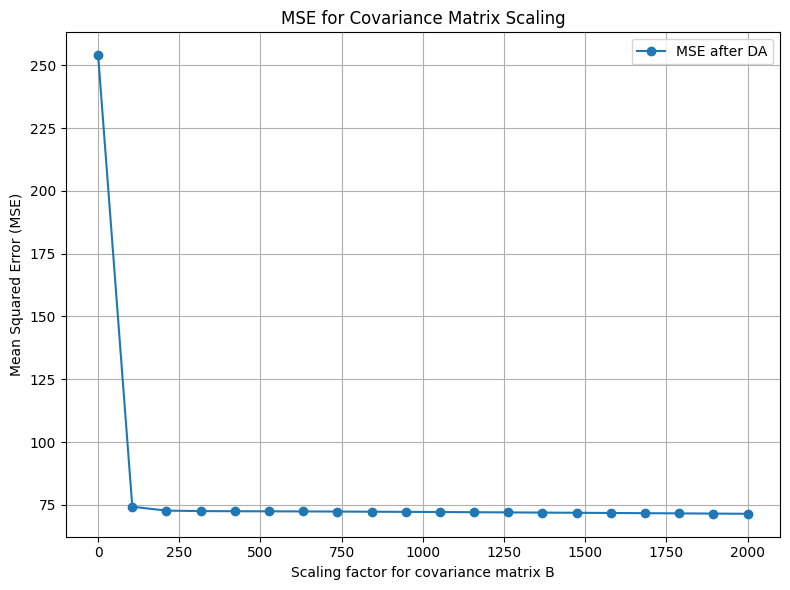

In [74]:
scale_and_plot_B(B_LSTM, np.linspace(0.1, 2000, 20), model_compressed_LSTM, sensor_compressed, H, R)

It seels like once we get to 250, there is not much improvement. I am going to plot this again with a smaller range. 

Start Assimilation
Scale factor (cov): 0.10, MSE before DA: 242.1047, MSE after DA: 253.9805
Scale factor (cov): 13.25, MSE before DA: 242.1047, MSE after DA: 126.6418
Scale factor (cov): 26.41, MSE before DA: 242.1047, MSE after DA: 96.7746
Scale factor (cov): 39.56, MSE before DA: 242.1047, MSE after DA: 85.6361
Scale factor (cov): 52.71, MSE before DA: 242.1047, MSE after DA: 80.4230
Scale factor (cov): 65.86, MSE before DA: 242.1047, MSE after DA: 77.6276
Scale factor (cov): 79.02, MSE before DA: 242.1047, MSE after DA: 75.9863
Scale factor (cov): 92.17, MSE before DA: 242.1047, MSE after DA: 74.9582
Scale factor (cov): 105.32, MSE before DA: 242.1047, MSE after DA: 74.2824
Scale factor (cov): 118.47, MSE before DA: 242.1047, MSE after DA: 73.8213
Scale factor (cov): 131.63, MSE before DA: 242.1047, MSE after DA: 73.4971
Scale factor (cov): 144.78, MSE before DA: 242.1047, MSE after DA: 73.2637
Scale factor (cov): 157.93, MSE before DA: 242.1047, MSE after DA: 73.0922
Scale factor 

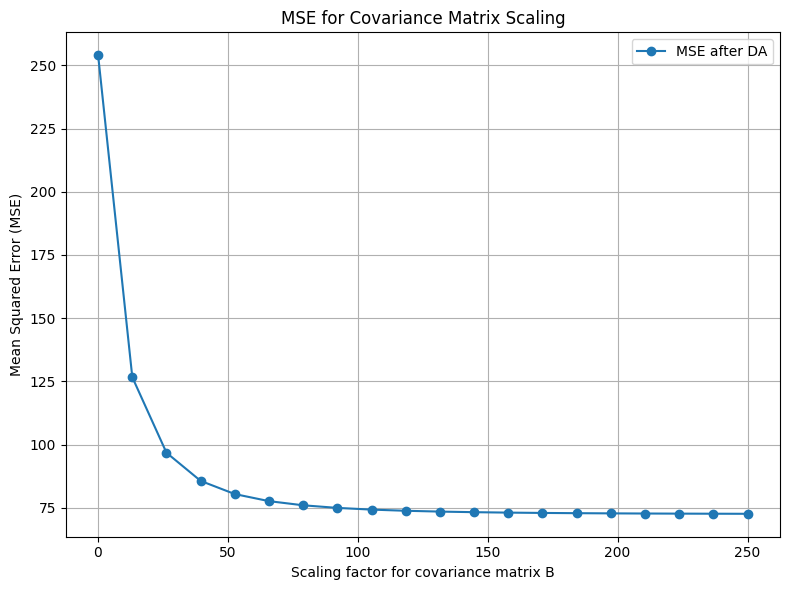

In [75]:
scale_and_plot_B(B_LSTM, np.linspace(0.1, 250, 20), model_compressed_LSTM, sensor_compressed, H, R)

We drop to 72 at 171. As such, I will scale my B for LSTM by a factor of 170. 

In [76]:
B_LSTM = B_LSTM * 170

**Calculating B for GAN**

Start Assimilation
Scale factor (cov): 0.10, MSE before DA: 411.5819, MSE after DA: 1618.6123
Scale factor (cov): 105.36, MSE before DA: 411.5819, MSE after DA: 1601.6625
Scale factor (cov): 210.62, MSE before DA: 411.5819, MSE after DA: 1585.0127
Scale factor (cov): 315.87, MSE before DA: 411.5819, MSE after DA: 1568.6559
Scale factor (cov): 421.13, MSE before DA: 411.5819, MSE after DA: 1552.5851
Scale factor (cov): 526.39, MSE before DA: 411.5819, MSE after DA: 1536.7935
Scale factor (cov): 631.65, MSE before DA: 411.5819, MSE after DA: 1521.2746
Scale factor (cov): 736.91, MSE before DA: 411.5819, MSE after DA: 1506.0220
Scale factor (cov): 842.16, MSE before DA: 411.5819, MSE after DA: 1491.0296
Scale factor (cov): 947.42, MSE before DA: 411.5819, MSE after DA: 1476.2913
Scale factor (cov): 1052.68, MSE before DA: 411.5819, MSE after DA: 1461.8013
Scale factor (cov): 1157.94, MSE before DA: 411.5819, MSE after DA: 1447.5540
Scale factor (cov): 1263.19, MSE before DA: 411.5819, MSE

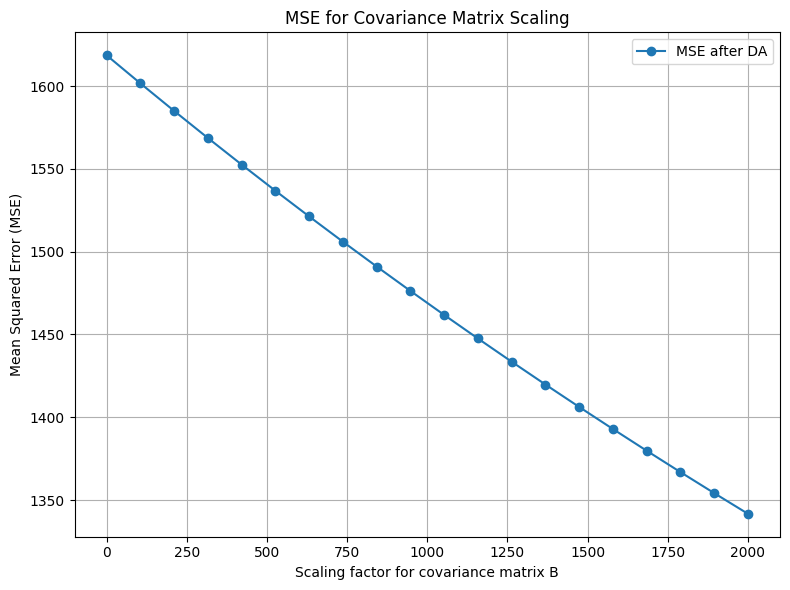

In [77]:
scale_and_plot_B(B_GAN, np.linspace(0.1, 2000, 20), model_compressed_GAN, sensor_compressed, H, R)

As opposed to the LSTM, we can see that for the GAN, we are still getting a steady decrease at 2000 of our MSE. Therefore, I am going to see if we go even higher. 

Start Assimilation
Scale factor (cov): 0.10, MSE before DA: 411.5819, MSE after DA: 1618.6123
Scale factor (cov): 26315.88, MSE before DA: 411.5819, MSE after DA: 396.5696
Scale factor (cov): 52631.67, MSE before DA: 411.5819, MSE after DA: 233.6625
Scale factor (cov): 78947.45, MSE before DA: 411.5819, MSE after DA: 176.8904
Scale factor (cov): 105263.24, MSE before DA: 411.5819, MSE after DA: 149.2556
Scale factor (cov): 131579.02, MSE before DA: 411.5819, MSE after DA: 133.2926
Scale factor (cov): 157894.81, MSE before DA: 411.5819, MSE after DA: 123.0595
Scale factor (cov): 184210.59, MSE before DA: 411.5819, MSE after DA: 116.0224
Scale factor (cov): 210526.37, MSE before DA: 411.5819, MSE after DA: 110.9313
Scale factor (cov): 236842.16, MSE before DA: 411.5819, MSE after DA: 107.1036
Scale factor (cov): 263157.94, MSE before DA: 411.5819, MSE after DA: 104.1377
Scale factor (cov): 289473.73, MSE before DA: 411.5819, MSE after DA: 101.7826
Scale factor (cov): 315789.51, MSE befor

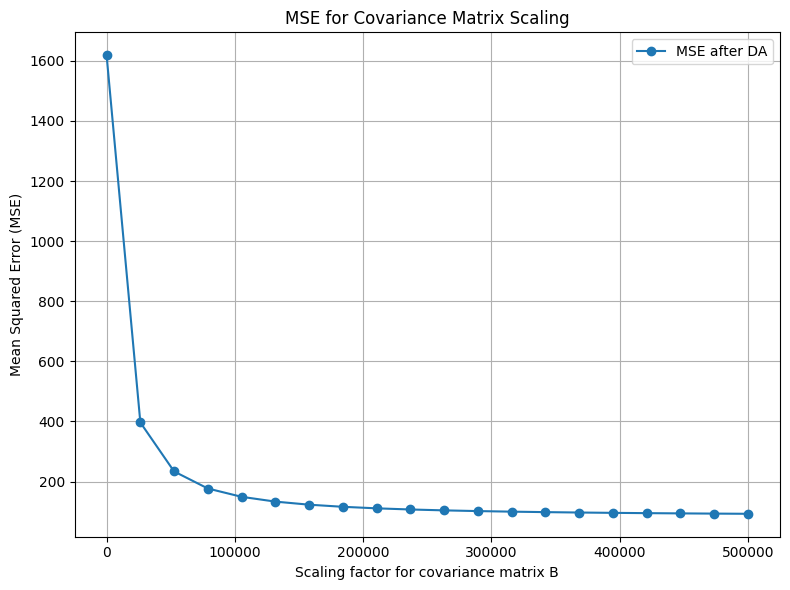

In [83]:
scale_and_plot_B(B_GAN, np.linspace(0.1, 500000, 20), model_compressed_GAN, sensor_compressed, H, R)

We are seeing a drop into the 90s at about 300000, but it continues to improve from there. For this reason, I am going to scale my B_GAN by a factor of 400000.

In [88]:
B_GAN = B_GAN * 400000

Now I am going to follow the same process for selecting R. I will need a new helper function. 

Start Assimilation
Scale factor (cov): 0.00, MSE before DA: 242.1047, MSE after DA: 44.7817
Scale factor (cov): 0.05, MSE before DA: 242.1047, MSE after DA: 70.5451
Scale factor (cov): 0.11, MSE before DA: 242.1047, MSE after DA: 71.7759
Scale factor (cov): 0.16, MSE before DA: 242.1047, MSE after DA: 72.1584
Scale factor (cov): 0.21, MSE before DA: 242.1047, MSE after DA: 72.3228
Scale factor (cov): 0.26, MSE before DA: 242.1047, MSE after DA: 72.4042
Scale factor (cov): 0.32, MSE before DA: 242.1047, MSE after DA: 72.4488
Scale factor (cov): 0.37, MSE before DA: 242.1047, MSE after DA: 72.4765
Scale factor (cov): 0.42, MSE before DA: 242.1047, MSE after DA: 72.4975
Scale factor (cov): 0.47, MSE before DA: 242.1047, MSE after DA: 72.5169
Scale factor (cov): 0.53, MSE before DA: 242.1047, MSE after DA: 72.5381
Scale factor (cov): 0.58, MSE before DA: 242.1047, MSE after DA: 72.5630
Scale factor (cov): 0.63, MSE before DA: 242.1047, MSE after DA: 72.5927
Scale factor (cov): 0.68, MSE be

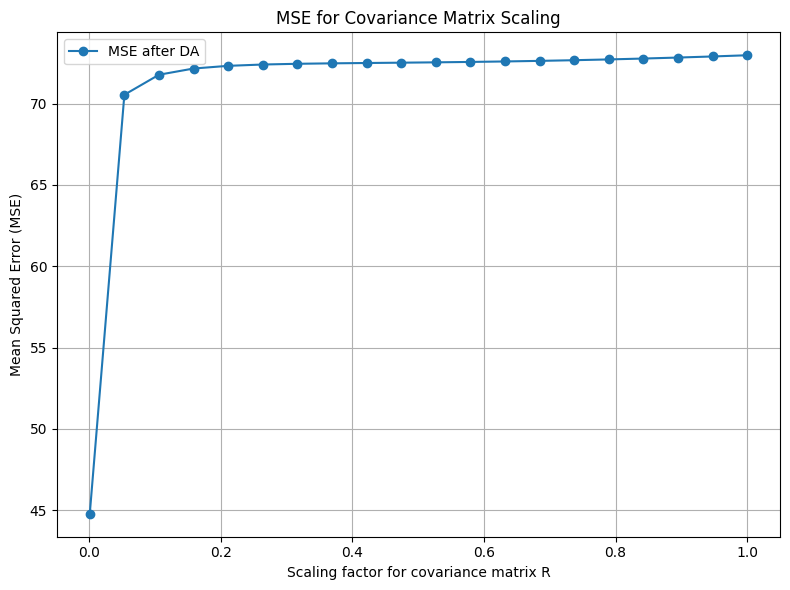

In [95]:
scale_and_plot_R(R, np.linspace(0.001, 1, 20), model_compressed_LSTM, sensor_compressed, H, B_LSTM)

Here we can obviously see that the closer we are to 0, the better our R is going to perform. I am going to do it over a smaller range. 

Start Assimilation
Scale factor (cov): 0.00, MSE before DA: 242.1047, MSE after DA: 42.0041
Scale factor (cov): 0.00, MSE before DA: 242.1047, MSE after DA: 43.1800
Scale factor (cov): 0.00, MSE before DA: 242.1047, MSE after DA: 45.0059
Scale factor (cov): 0.00, MSE before DA: 242.1047, MSE after DA: 46.9170
Scale factor (cov): 0.00, MSE before DA: 242.1047, MSE after DA: 48.7254
Scale factor (cov): 0.00, MSE before DA: 242.1047, MSE after DA: 50.3755
Scale factor (cov): 0.00, MSE before DA: 242.1047, MSE after DA: 51.8602
Scale factor (cov): 0.00, MSE before DA: 242.1047, MSE after DA: 53.1902
Scale factor (cov): 0.00, MSE before DA: 242.1047, MSE after DA: 54.3814
Scale factor (cov): 0.00, MSE before DA: 242.1047, MSE after DA: 55.4505
Scale factor (cov): 0.01, MSE before DA: 242.1047, MSE after DA: 56.4130
Scale factor (cov): 0.01, MSE before DA: 242.1047, MSE after DA: 57.2825
Scale factor (cov): 0.01, MSE before DA: 242.1047, MSE after DA: 58.0709
Scale factor (cov): 0.01, MSE be

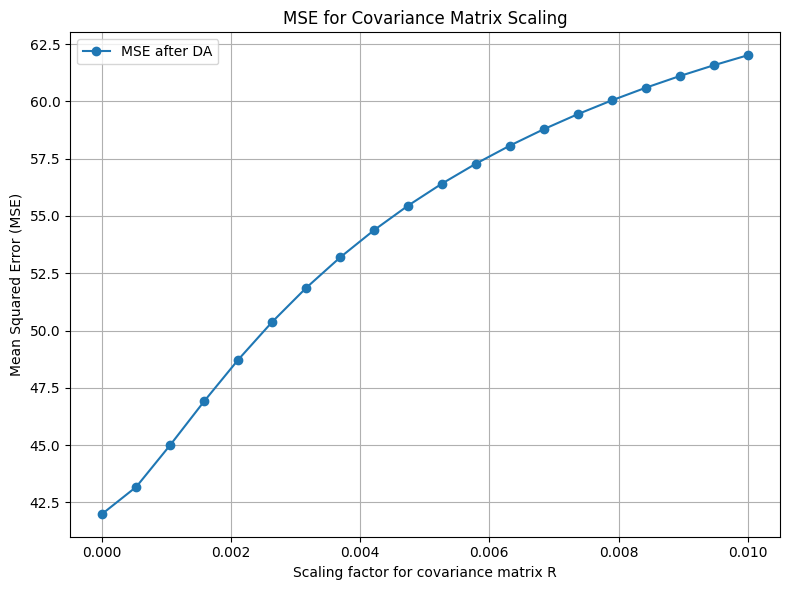

In [98]:
scale_and_plot_R(R, np.linspace(0.00001, .01, 20), model_compressed_LSTM, sensor_compressed, H, B_LSTM)

Even here, the smallest factor is giving the best performance, so I will scale my R by 0.00001

In [99]:
R_LSTM = R * 0.001

Now I will apply these same principles for the GAN. 

Start Assimilation
Scale factor (cov): 0.00, MSE before DA: 411.5819, MSE after DA: 45.6314
Scale factor (cov): 0.01, MSE before DA: 411.5819, MSE after DA: 108.3827
Scale factor (cov): 0.01, MSE before DA: 411.5819, MSE after DA: 92.1874
Scale factor (cov): 0.02, MSE before DA: 411.5819, MSE after DA: 87.9718
Scale factor (cov): 0.02, MSE before DA: 411.5819, MSE after DA: 89.7410
Scale factor (cov): 0.03, MSE before DA: 411.5819, MSE after DA: 84.8836
Scale factor (cov): 0.03, MSE before DA: 411.5819, MSE after DA: 87.7910
Scale factor (cov): 0.04, MSE before DA: 411.5819, MSE after DA: 86.6040
Scale factor (cov): 0.04, MSE before DA: 411.5819, MSE after DA: 87.5569
Scale factor (cov): 0.05, MSE before DA: 411.5819, MSE after DA: 86.0176
Scale factor (cov): 0.05, MSE before DA: 411.5819, MSE after DA: 87.2047
Scale factor (cov): 0.06, MSE before DA: 411.5819, MSE after DA: 85.2694
Scale factor (cov): 0.06, MSE before DA: 411.5819, MSE after DA: 85.3146
Scale factor (cov): 0.07, MSE b

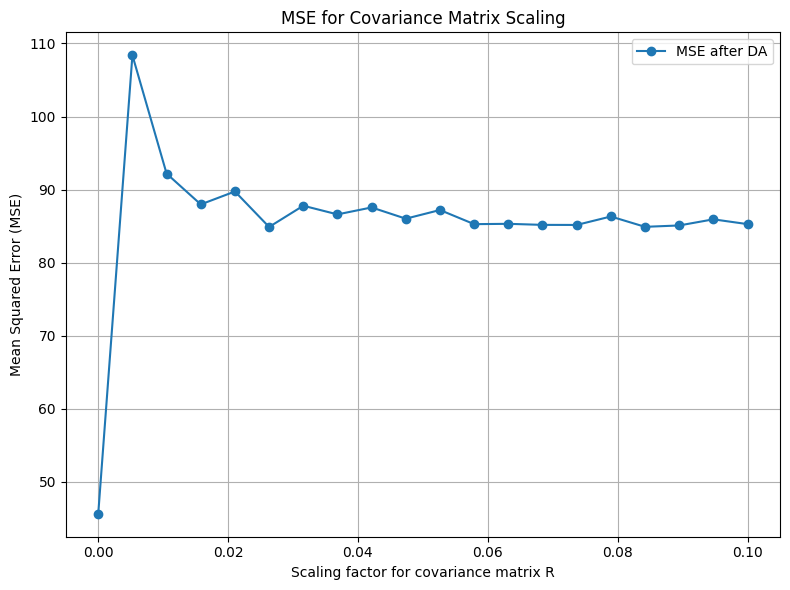

In [101]:
scale_and_plot_R(R, np.linspace(0.00001, .1, 20), model_compressed_GAN, sensor_compressed, H, B_GAN)

Here the evidence is even more stark that .00001 is better performing than anything bigger. 

In [102]:
R_GAN = R * .00001

### Running Final Assimilation for both GAN and LSTM 

In [120]:
GAN_background = GAN_background[:-1, :, :]

**LSTM first**

In [110]:
updated_recovered = data_assimilation(model_compressed, sensor_compressed, sensor, LSTM_background, sensor_1D, pca, B, H, R)

MSE before DA in Reduced Space: 242.10470619252237
MSE after DA in Reduced Space: 44.78168255255183
Time for DA: 0.0013201236724853516 seconds
----------------------------------------
MSE before DA in Physical Space: 0.06740322343717355
MSE after DA in Physical Space: 0.0027332569917328966
Time for DA + Decompression: 0.014187097549438477 seconds


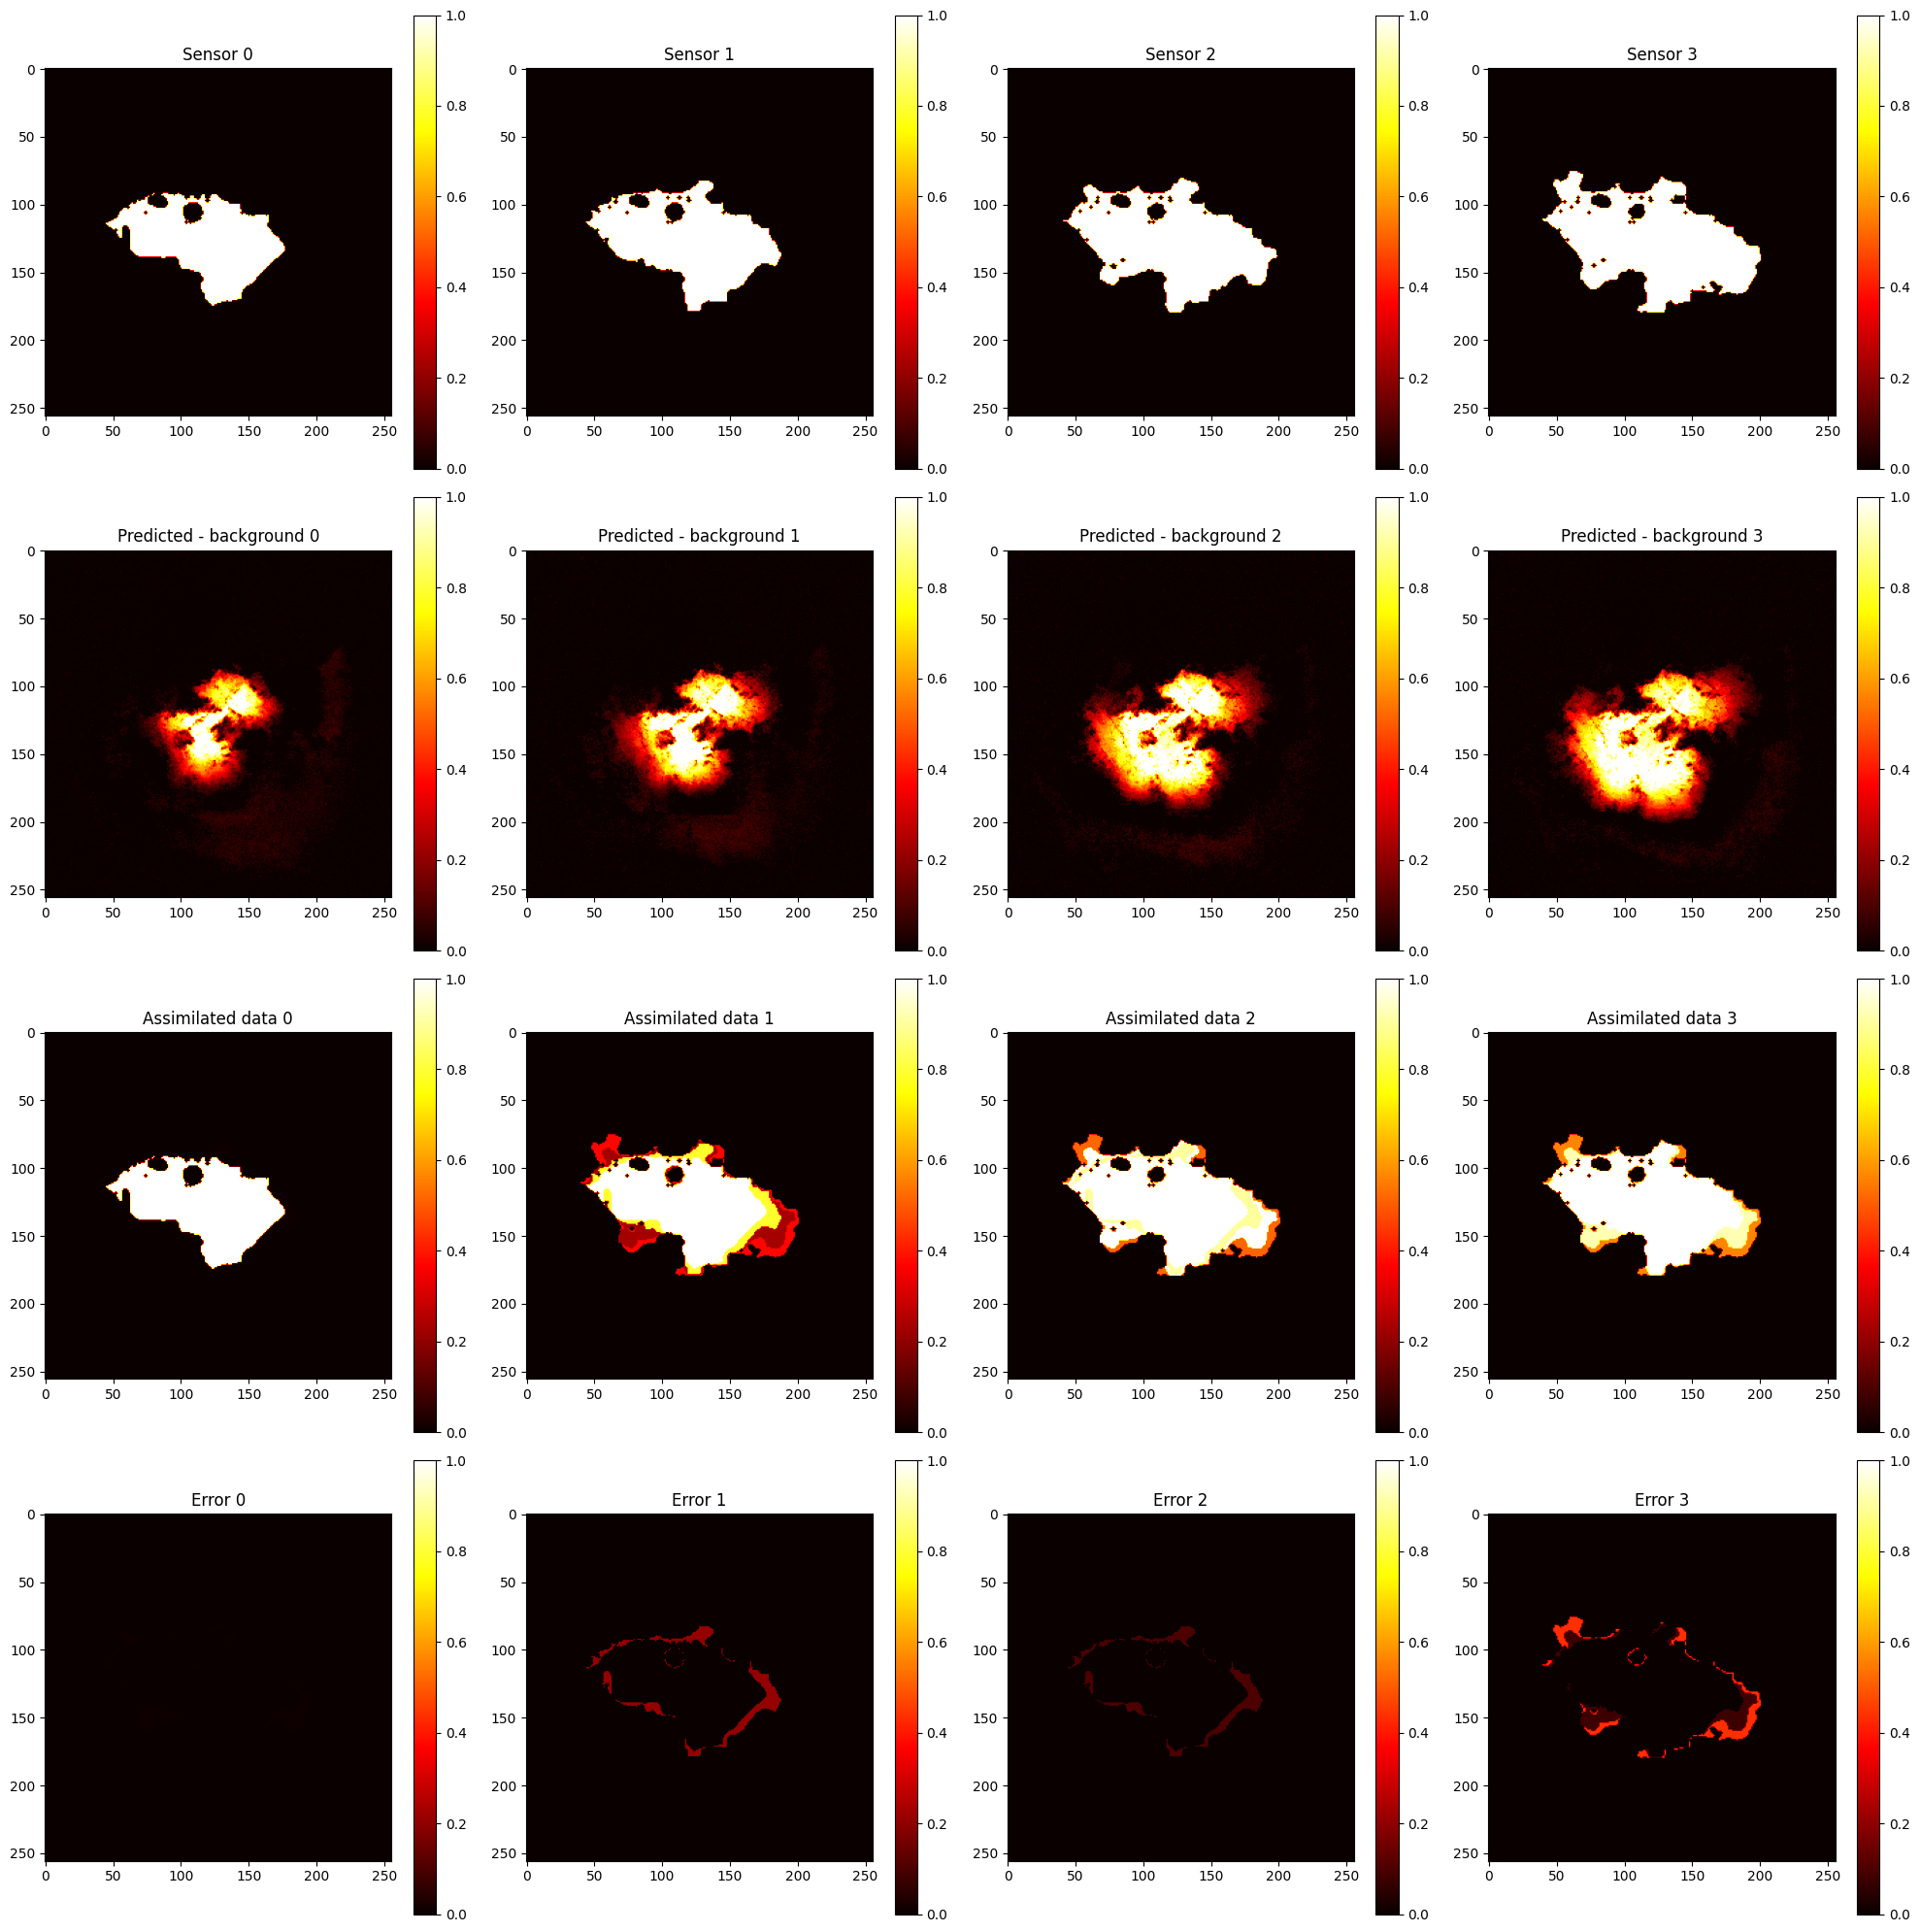

In [109]:
plot_data(sensor, LSTM_background, updated_recovered)

**Now GAN**

In [122]:
#GAN 
updated_recovered = data_assimilation(model_compressed, sensor_compressed, sensor, GAN_background, sensor_1D, pca, B, H, R)

MSE before DA in Reduced Space: 411.5819362501411
MSE after DA in Reduced Space: 45.63140476036139
Time for DA: 0.0006780624389648438 seconds
----------------------------------------
MSE before DA in Physical Space: 0.10106277465820312
MSE after DA in Physical Space: 0.0027851199194556643
Time for DA + Decompression: 0.01785111427307129 seconds


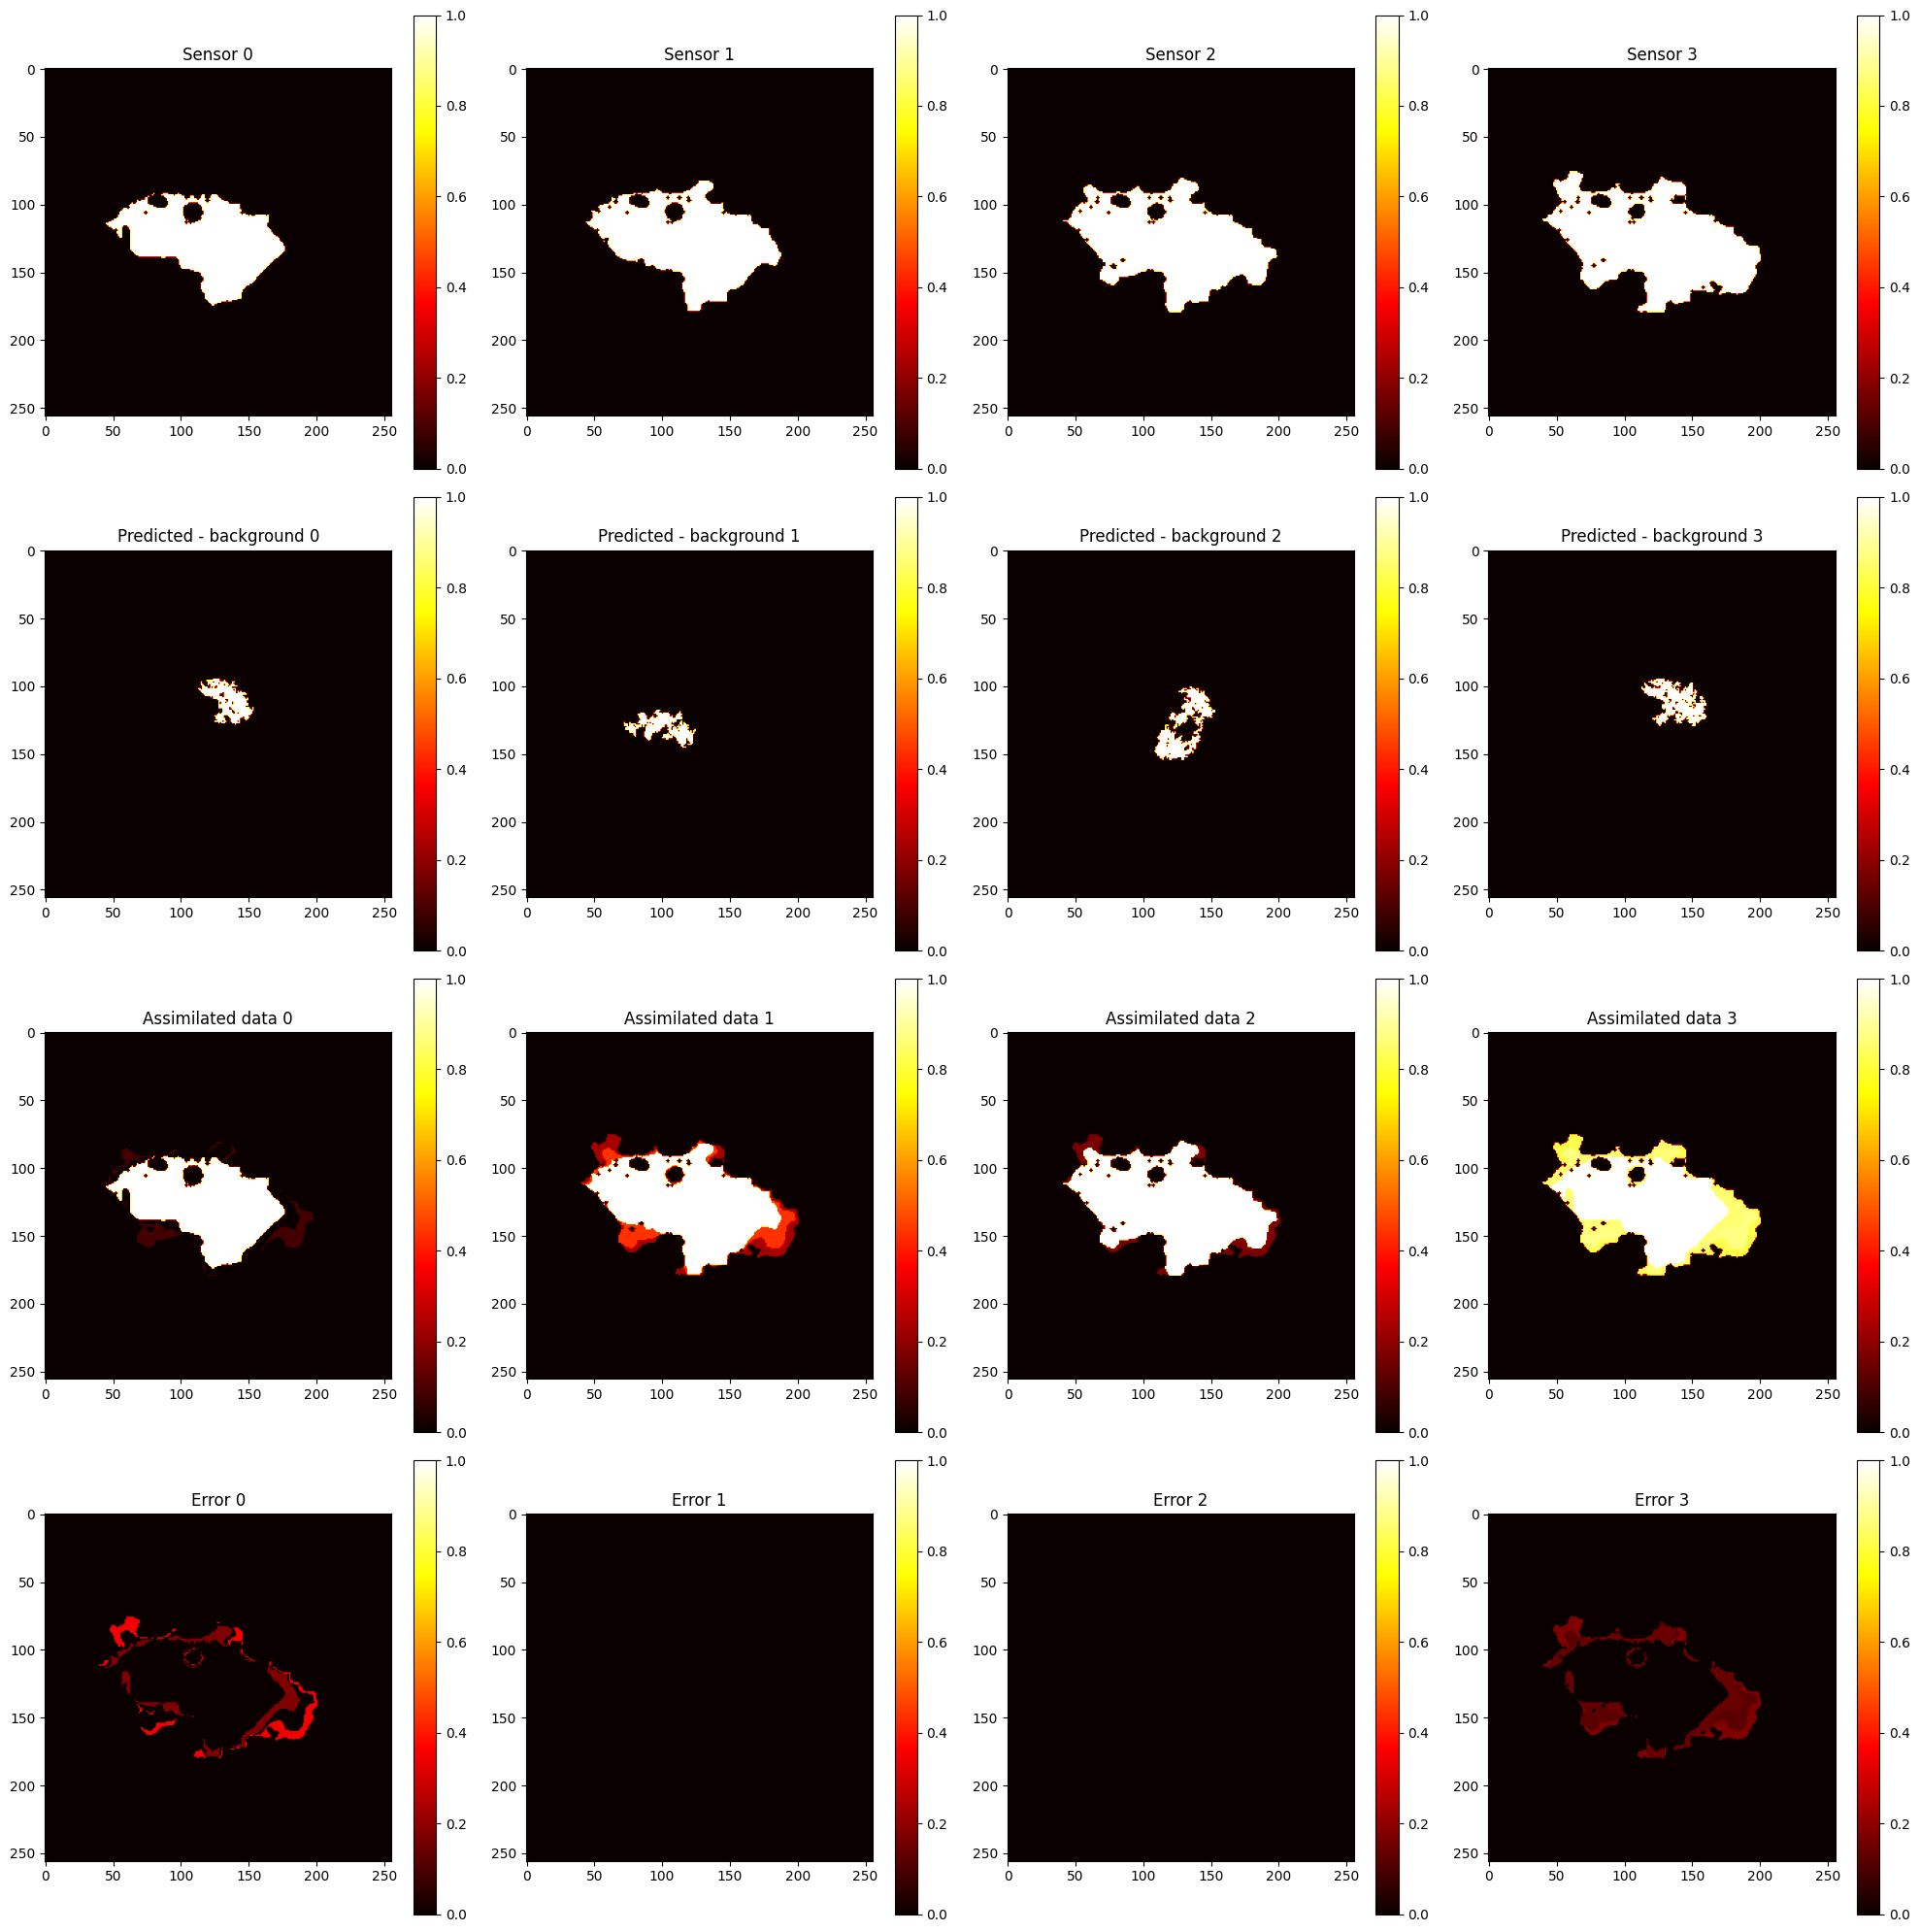

In [124]:
plot_data(sensor, GAN_background, updated_recovered)
